# 🍄 Analisis Klasifikasi Secondary Mushroom Dataset

## 📋 Deskripsi Proyek
Notebook ini berisi analisis lengkap untuk klasifikasi jamur menggunakan **Secondary Mushroom Dataset** dari UCI Machine Learning Repository. Dataset ini berisi informasi morfologi jamur untuk memprediksi apakah jamur tersebut dapat dimakan (edible) atau beracun (poisonous).

## 🎯 Tujuan Analisis
1. Memahami karakteristik data jamur
2. Melakukan eksplorasi dan visualisasi data (EDA)
3. Membangun model klasifikasi terbaik
4. Membandingkan performa berbagai algoritma
5. Mengidentifikasi fitur-fitur penting yang mempengaruhi klasifikasi
6. Validasi model dengan data tambahan

## 📊 Strategi Penggunaan Data
- **Data Training & Validation**: Maksimal 2000 sampel
- **Data Test Tambahan**: Sisa data untuk pengujian final model terbaik

---

## 📦 1. Import Library dan Setup Awal

Pada bagian ini, kita akan mengimpor semua library yang diperlukan untuk analisis data, visualisasi, preprocessing, dan modeling.

In [1]:
# Data manipulation dan analisis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Modeling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluasi
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, precision_recall_curve)

# Statistical tests
from scipy.stats import chi2_contingency, pointbiserialr
from scipy.stats import shapiro, normaltest

# Set random seed untuk reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✅ Semua library berhasil diimpor!")
print(f"📌 Random State: {RANDOM_STATE}")

✅ Semua library berhasil diimpor!
📌 Random State: 42


## 📥 2. Load Data dari UCI Repository

Kita akan mengunduh dataset Secondary Mushroom langsung dari UCI Machine Learning Repository menggunakan library `ucimlrepo`.

In [2]:
# Install library jika belum tersedia
%pip install ucimlrepo -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load dataset dari UCI Repository
from ucimlrepo import fetch_ucirepo

print("📡 Mengunduh Secondary Mushroom Dataset dari UCI Repository...")
secondary_mushroom = fetch_ucirepo(id=848)

# Pisahkan features dan target
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

print("✅ Dataset berhasil diunduh!")
print(f"📊 Ukuran dataset: {X.shape[0]} baris, {X.shape[1]} kolom fitur")
print(f"🎯 Target variable: {y.columns[0]}")
print(f"\n📝 Metadata:")
print(f"   - Nama: {secondary_mushroom.metadata['name']}")
print(f"   - Area: {secondary_mushroom.metadata.get('area', 'N/A')}")
print(f"   - Task: {secondary_mushroom.metadata.get('task', 'N/A')}")

📡 Mengunduh Secondary Mushroom Dataset dari UCI Repository...
✅ Dataset berhasil diunduh!
📊 Ukuran dataset: 61069 baris, 20 kolom fitur
🎯 Target variable: class

📝 Metadata:
   - Nama: Secondary Mushroom
   - Area: Biology
   - Task: N/A
✅ Dataset berhasil diunduh!
📊 Ukuran dataset: 61069 baris, 20 kolom fitur
🎯 Target variable: class

📝 Metadata:
   - Nama: Secondary Mushroom
   - Area: Biology
   - Task: N/A


## 🔍 3. Pemahaman Data Awal (Initial Data Understanding)

Mari kita lihat struktur data, tipe data, dan informasi dasar lainnya.

In [4]:
# Gabungkan X dan y untuk analisis lebih mudah
df = pd.concat([X, y], axis=1)

print("=" * 80)
print("📋 INFORMASI DATASET")
print("=" * 80)
print(f"\n🔢 Dimensi Dataset: {df.shape[0]} baris × {df.shape[1]} kolom")
print(f"\n📊 Nama Kolom:\n{df.columns.tolist()}")
print(f"\n💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Tampilkan 5 baris pertama
print("\n" + "=" * 80)
print("📝 PREVIEW DATA (5 baris pertama)")
print("=" * 80)
display(df.head())

# Info dataset
print("\n" + "=" * 80)
print("ℹ️ INFORMASI TIPE DATA DAN NULL VALUES")
print("=" * 80)
df.info()

📋 INFORMASI DATASET

🔢 Dimensi Dataset: 61069 baris × 21 kolom

📊 Nama Kolom:
['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season', 'class']

💾 Memory Usage: 48.54 MB

📝 PREVIEW DATA (5 baris pertama)


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,...,y,w,u,w,t,g,NaN,d,w,p
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,...,y,w,u,w,t,g,NaN,d,u,p
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,...,y,w,u,w,t,g,NaN,d,w,p
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,...,y,w,u,w,t,p,NaN,d,w,p
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,...,y,w,u,w,t,p,NaN,d,w,p



ℹ️ INFORMASI TIPE DATA DAN NULL VALUES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             9531 non-null   object 
 11  stem-surface          22945 non-null  object 
 12  stem-color            61069 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            7413 non

In [5]:
# Statistik deskriptif untuk kolom numerik
print("=" * 80)
print("📈 STATISTIK DESKRIPTIF - KOLOM NUMERIK")
print("=" * 80)
display(df.describe())

# Untuk kolom kategorikal
print("\n" + "=" * 80)
print("📊 STATISTIK DESKRIPTIF - KOLOM KATEGORIKAL")
print("=" * 80)
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    display(df[categorical_cols].describe())
else:
    print("Tidak ada kolom kategorikal dalam dataset.")

📈 STATISTIK DESKRIPTIF - KOLOM NUMERIK


,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000



📊 STATISTIK DESKRIPTIF - KOLOM KATEGORIKAL


,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
count,61069,46949,61069,61069,51185,36006,61069,9531,22945,61069,3177,7413,61069,58598,6354,61069,61069,61069
unique,7,11,12,2,7,3,12,5,8,13,1,6,2,8,7,8,4,2
top,x,t,n,f,a,c,w,s,s,w,u,w,f,f,k,d,a,p
freq,26934,8196,24218,50479,12698,24710,18521,3177,6025,22926,3177,5474,45890,48361,2118,44209,30177,33888


## 🔬 4. Pemeriksaan Kualitas Data (Data Quality Assessment)

Pada bagian ini, kita akan melakukan berbagai uji untuk memastikan kualitas data:
1. **Missing Values Analysis**: Memeriksa data yang hilang
2. **Duplicate Detection**: Mendeteksi data duplikat
3. **Outlier Detection**: Mengidentifikasi outlier
4. **Data Validity Tests**: Uji validitas dan konsistensi data

### 4.1 Analisis Missing Values

❌ ANALISIS MISSING VALUES
⚠️ Ditemukan 9 kolom dengan missing values:



,Kolom,Missing Count,Missing %
13,veil-type,57892,94.797688
17,spore-print-color,54715,89.595376
14,veil-color,53656,87.861272
10,stem-root,51538,84.393064
11,stem-surface,38124,62.427746
6,gill-spacing,25063,41.040462
2,cap-surface,14120,23.121387
5,gill-attachment,9884,16.184971
16,ring-type,2471,4.046243


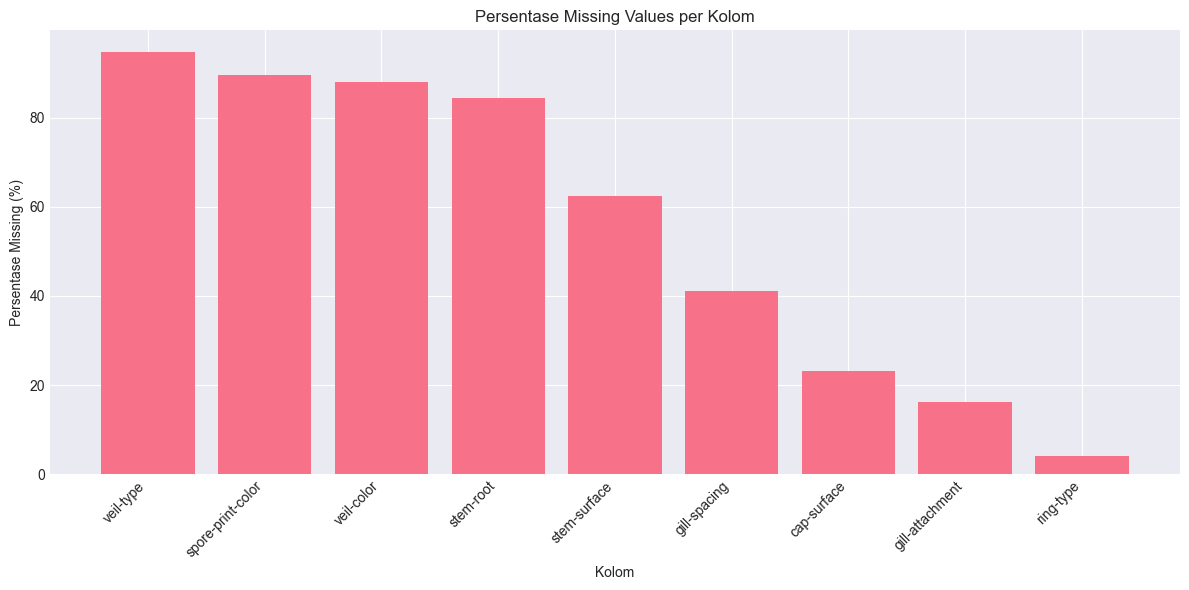


📊 Total missing values: 307463
📊 Persentase total missing: 23.97%


In [6]:
# Hitung missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Buat dataframe ringkasan
missing_df = pd.DataFrame({
    'Kolom': missing_values.index,
    'Missing Count': missing_values.values,
    'Missing %': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

print("=" * 80)
print("❌ ANALISIS MISSING VALUES")
print("=" * 80)

if len(missing_df) == 0:
    print("✅ TIDAK ADA MISSING VALUES dalam dataset!")
else:
    print(f"⚠️ Ditemukan {len(missing_df)} kolom dengan missing values:\n")
    display(missing_df)
    
    # Visualisasi missing values
    plt.figure(figsize=(12, 6))
    plt.bar(missing_df['Kolom'], missing_df['Missing %'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Persentase Missing (%)')
    plt.xlabel('Kolom')
    plt.title('Persentase Missing Values per Kolom')
    plt.tight_layout()
    plt.show()

print(f"\n📊 Total missing values: {missing_values.sum()}")
print(f"📊 Persentase total missing: {(missing_values.sum() / (len(df) * len(df.columns))) * 100:.2f}%")

### 4.2 Deteksi Data Duplikat

In [7]:
# Cek data duplikat
duplicates = df.duplicated().sum()
duplicate_percent = (duplicates / len(df)) * 100

print("=" * 80)
print("🔄 ANALISIS DATA DUPLIKAT")
print("=" * 80)
print(f"Total baris: {len(df)}")
print(f"Baris duplikat: {duplicates}")
print(f"Persentase duplikat: {duplicate_percent:.2f}%")

if duplicates > 0:
    print(f"\n⚠️ Ditemukan {duplicates} baris duplikat!")
    print("\n📋 Contoh data duplikat:")
    display(df[df.duplicated(keep=False)].head(10))
else:
    print("\n✅ TIDAK ADA DATA DUPLIKAT dalam dataset!")

🔄 ANALISIS DATA DUPLIKAT
Total baris: 61069
Baris duplikat: 146
Persentase duplikat: 0.24%

⚠️ Ditemukan 146 baris duplikat!

📋 Contoh data duplikat:


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
9670,1.14,x,g,w,f,a,d,w,3.13,1.78,...,NaN,e,NaN,NaN,f,f,NaN,d,u,p
9863,1.14,x,g,w,f,a,d,w,3.13,1.78,...,NaN,e,NaN,NaN,f,f,NaN,d,u,p
12712,0.72,x,g,y,f,NaN,NaN,y,3.51,0.77,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p
12978,0.72,x,g,y,f,NaN,NaN,y,3.51,0.77,...,NaN,y,NaN,NaN,f,f,NaN,d,u,p
56481,4.29,o,t,w,f,NaN,c,w,0.00,0.00,...,f,f,NaN,NaN,f,f,n,d,u,p
56487,4.27,o,s,n,f,NaN,c,w,0.00,0.00,...,f,f,NaN,NaN,f,f,n,d,u,p
56488,4.62,o,t,n,f,NaN,c,w,0.00,0.00,...,f,f,NaN,NaN,f,f,n,d,u,p
56491,3.83,o,s,w,f,NaN,c,w,0.00,0.00,...,f,f,NaN,NaN,f,f,n,d,u,p
56498,4.32,o,s,w,f,NaN,c,w,0.00,0.00,...,f,f,NaN,NaN,f,f,n,d,a,p
56499,4.89,o,s,n,f,NaN,c,w,0.00,0.00,...,f,f,NaN,NaN,f,f,n,d,u,p


### 4.3 Analisis Distribusi Target Variable

🎯 ANALISIS TARGET VARIABLE: 'class'

📊 Distribusi Kelas:
   p: 33888 (55.49%)
   e: 27181 (44.51%)


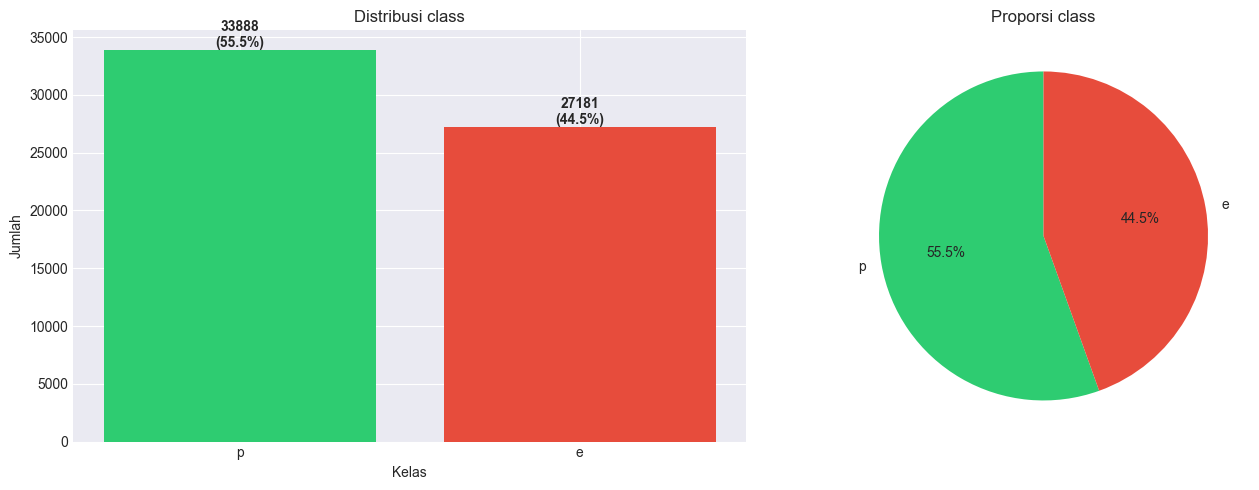


⚖️ Rasio Imbalance: 1.25:1
   ✅ Dataset relatif balanced.


In [8]:
# Identifikasi kolom target
target_col = y.columns[0]

print("=" * 80)
print(f"🎯 ANALISIS TARGET VARIABLE: '{target_col}'")
print("=" * 80)

# Distribusi target
target_counts = df[target_col].value_counts()
target_percent = df[target_col].value_counts(normalize=True) * 100

print("\n📊 Distribusi Kelas:")
for cls, count in target_counts.items():
    pct = target_percent[cls]
    print(f"   {cls}: {count} ({pct:.2f}%)")

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(target_counts.index.astype(str), target_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_xlabel('Kelas')
axes[0].set_ylabel('Jumlah')
axes[0].set_title(f'Distribusi {target_col}')
for i, (cls, count) in enumerate(target_counts.items()):
    axes[0].text(i, count, f'{count}\n({target_percent[cls]:.1f}%)', 
                 ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title(f'Proporsi {target_col}')

plt.tight_layout()
plt.show()

# Cek class imbalance
imbalance_ratio = target_counts.max() / target_counts.min()
print(f"\n⚖️ Rasio Imbalance: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 1.5:
    print("   ⚠️ Dataset cukup imbalanced. Perlu diperhatikan dalam modeling.")
else:
    print("   ✅ Dataset relatif balanced.")

### 4.4 Deteksi Outlier (untuk kolom numerik)

📦 DETEKSI OUTLIER (Metode IQR)


,Kolom,Outlier Count,Outlier %,Lower Bound,Upper Bound
0,cap-diameter,2400,3.93%,-4.11,16.13
1,stem-height,3169,5.19%,-0.01,12.39
2,stem-width,1967,3.22%,-11.83,33.61



⚠️ Ditemukan outlier pada 3 kolom


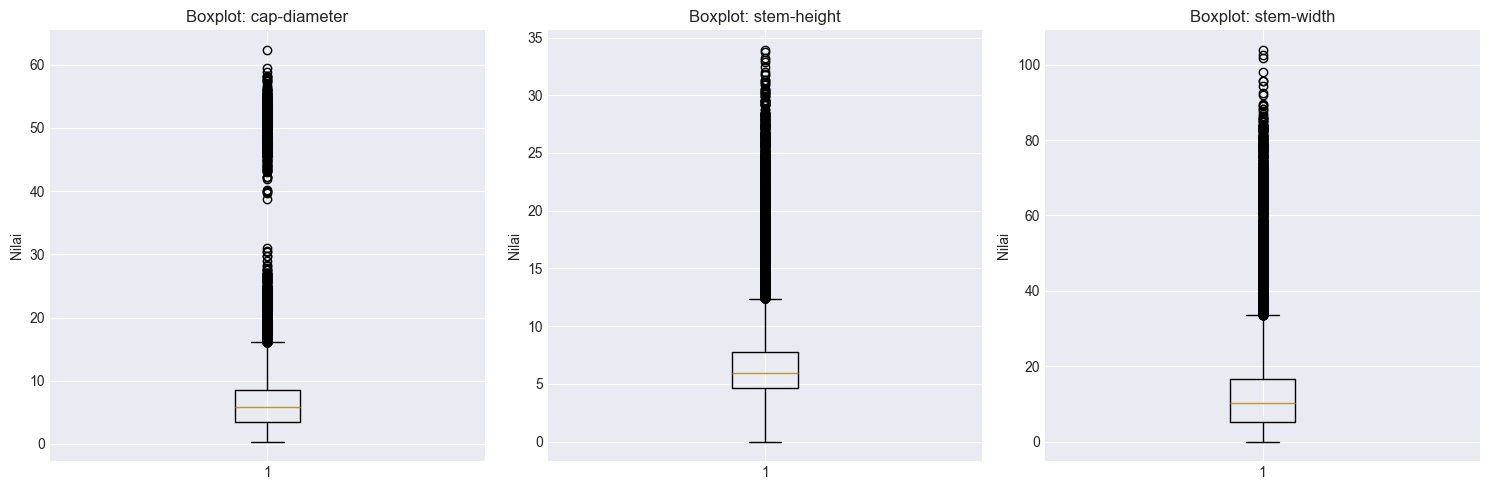

In [9]:
# Identifikasi kolom numerik (kecuali target)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

print("=" * 80)
print("📦 DETEKSI OUTLIER (Metode IQR)")
print("=" * 80)

if len(numeric_cols) == 0:
    print("ℹ️ Tidak ada kolom numerik untuk dianalisis outlier.")
else:
    outlier_summary = []
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percent = (outlier_count / len(df)) * 100
        
        outlier_summary.append({
            'Kolom': col,
            'Outlier Count': outlier_count,
            'Outlier %': f'{outlier_percent:.2f}%',
            'Lower Bound': f'{lower_bound:.2f}',
            'Upper Bound': f'{upper_bound:.2f}'
        })
    
    outlier_df = pd.DataFrame(outlier_summary)
    display(outlier_df)
    
    # Visualisasi boxplot untuk kolom dengan outlier
    cols_with_outliers = outlier_df[outlier_df['Outlier Count'] > 0]['Kolom'].tolist()
    
    if len(cols_with_outliers) > 0:
        print(f"\n⚠️ Ditemukan outlier pada {len(cols_with_outliers)} kolom")
        
        # Buat boxplot
        n_cols = min(3, len(cols_with_outliers))
        n_rows = (len(cols_with_outliers) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        if n_rows * n_cols > 1:
            axes = axes.flatten()
        else:
            axes = [axes]
        
        for idx, col in enumerate(cols_with_outliers[:n_rows*n_cols]):
            axes[idx].boxplot(df[col].dropna(), vert=True)
            axes[idx].set_title(f'Boxplot: {col}')
            axes[idx].set_ylabel('Nilai')
        
        # Sembunyikan subplot kosong
        for idx in range(len(cols_with_outliers), n_rows*n_cols):
            axes[idx].axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("\n✅ Tidak ada outlier terdeteksi dalam kolom numerik.")

## 📊 5. Exploratory Data Analysis (EDA)

Pada bagian ini, kita akan melakukan analisis mendalam untuk memahami pola, hubungan, dan karakteristik data.

### 5.1 Distribusi Fitur Numerik

📈 DISTRIBUSI FITUR NUMERIK


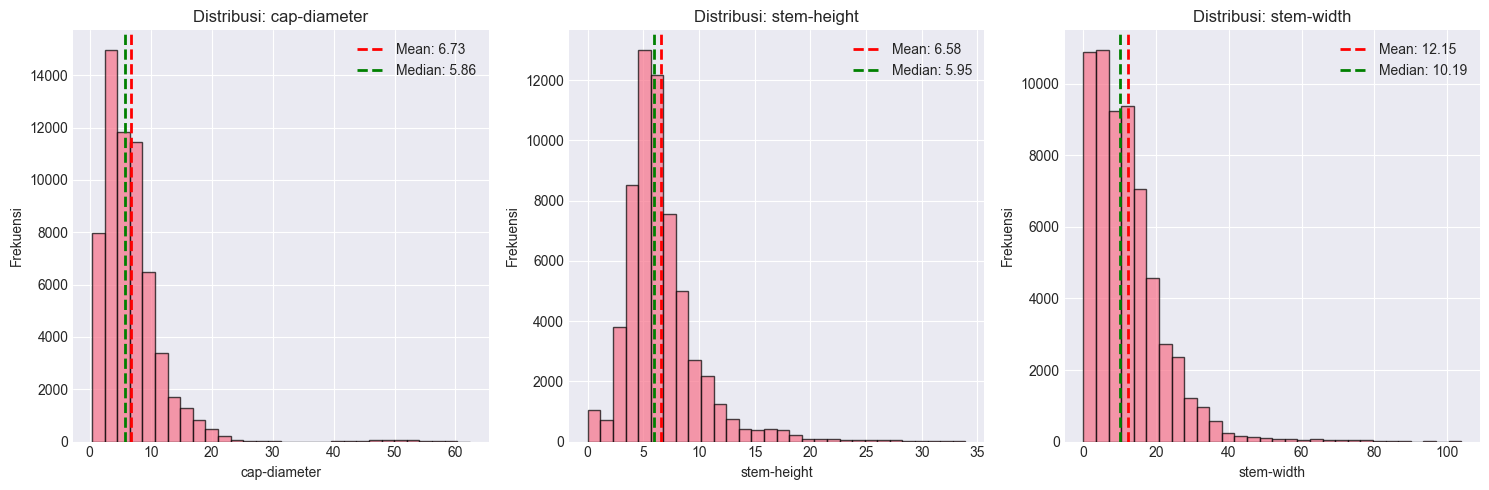

In [10]:
if len(numeric_cols) > 0:
    print("=" * 80)
    print("📈 DISTRIBUSI FITUR NUMERIK")
    print("=" * 80)
    
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows * n_cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
    
    for idx, col in enumerate(numeric_cols):
        axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribusi: {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frekuensi')
        
        # Tambahkan statistik
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        axes[idx].legend()
    
    # Sembunyikan subplot kosong
    for idx in range(len(numeric_cols), n_rows*n_cols):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("ℹ️ Tidak ada kolom numerik untuk divisualisasikan.")

### 5.2 Korelasi Antar Fitur Numerik

🔗 CORRELATION MATRIX - FITUR NUMERIK


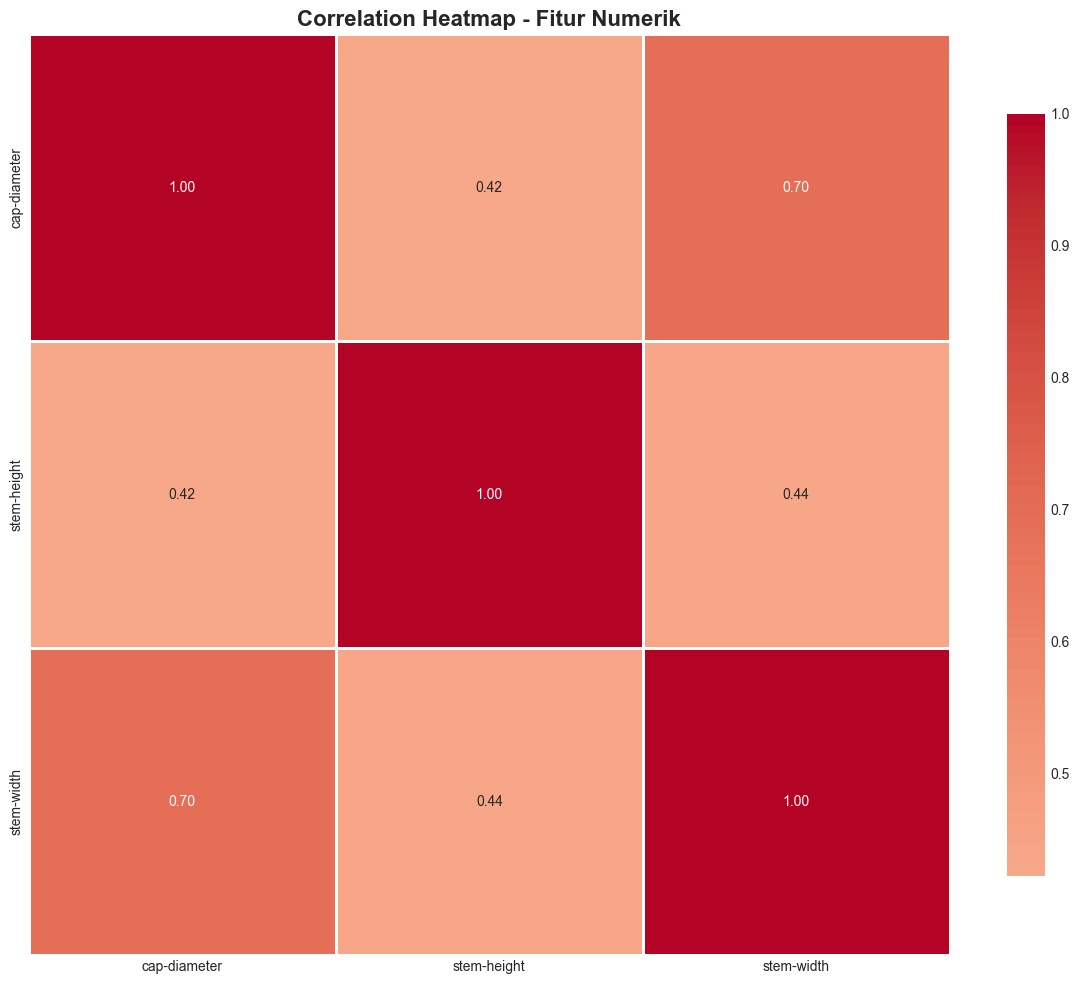


✅ Tidak ada multikolinearitas tinggi antar fitur numerik.


In [11]:
if len(numeric_cols) > 1:
    print("=" * 80)
    print("🔗 CORRELATION MATRIX - FITUR NUMERIK")
    print("=" * 80)
    
    # Hitung korelasi
    corr_matrix = df[numeric_cols].corr()
    
    # Visualisasi heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap - Fitur Numerik', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Identifikasi korelasi tinggi (> 0.7 atau < -0.7)
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                high_corr.append({
                    'Feature 1': corr_matrix.columns[i],
                    'Feature 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    if len(high_corr) > 0:
        print("\n⚠️ Pasangan fitur dengan korelasi tinggi (|r| > 0.7):")
        display(pd.DataFrame(high_corr))
        print("\n💡 Pertimbangkan untuk menghapus salah satu dari fitur yang berkorelasi tinggi.")
    else:
        print("\n✅ Tidak ada multikolinearitas tinggi antar fitur numerik.")
else:
    print("ℹ️ Tidak cukup kolom numerik untuk analisis korelasi.")

### 5.3 Analisis Fitur Kategorikal

📊 ANALISIS FITUR KATEGORIKAL

Jumlah fitur kategorikal: 17



,Kolom,Unique Values,Most Common,Most Common Count,Most Common %
0,cap-shape,7,x,26934,44.10%
1,cap-surface,11,t,8196,13.42%
2,cap-color,12,n,24218,39.66%
3,does-bruise-or-bleed,2,f,50479,82.66%
4,gill-attachment,7,a,12698,20.79%
5,gill-spacing,3,c,24710,40.46%
6,gill-color,12,w,18521,30.33%
7,stem-root,5,b,3177,5.20%
8,stem-surface,8,s,6025,9.87%
9,stem-color,13,w,22926,37.54%



📊 Visualisasi distribusi untuk 13 fitur kategorikal:


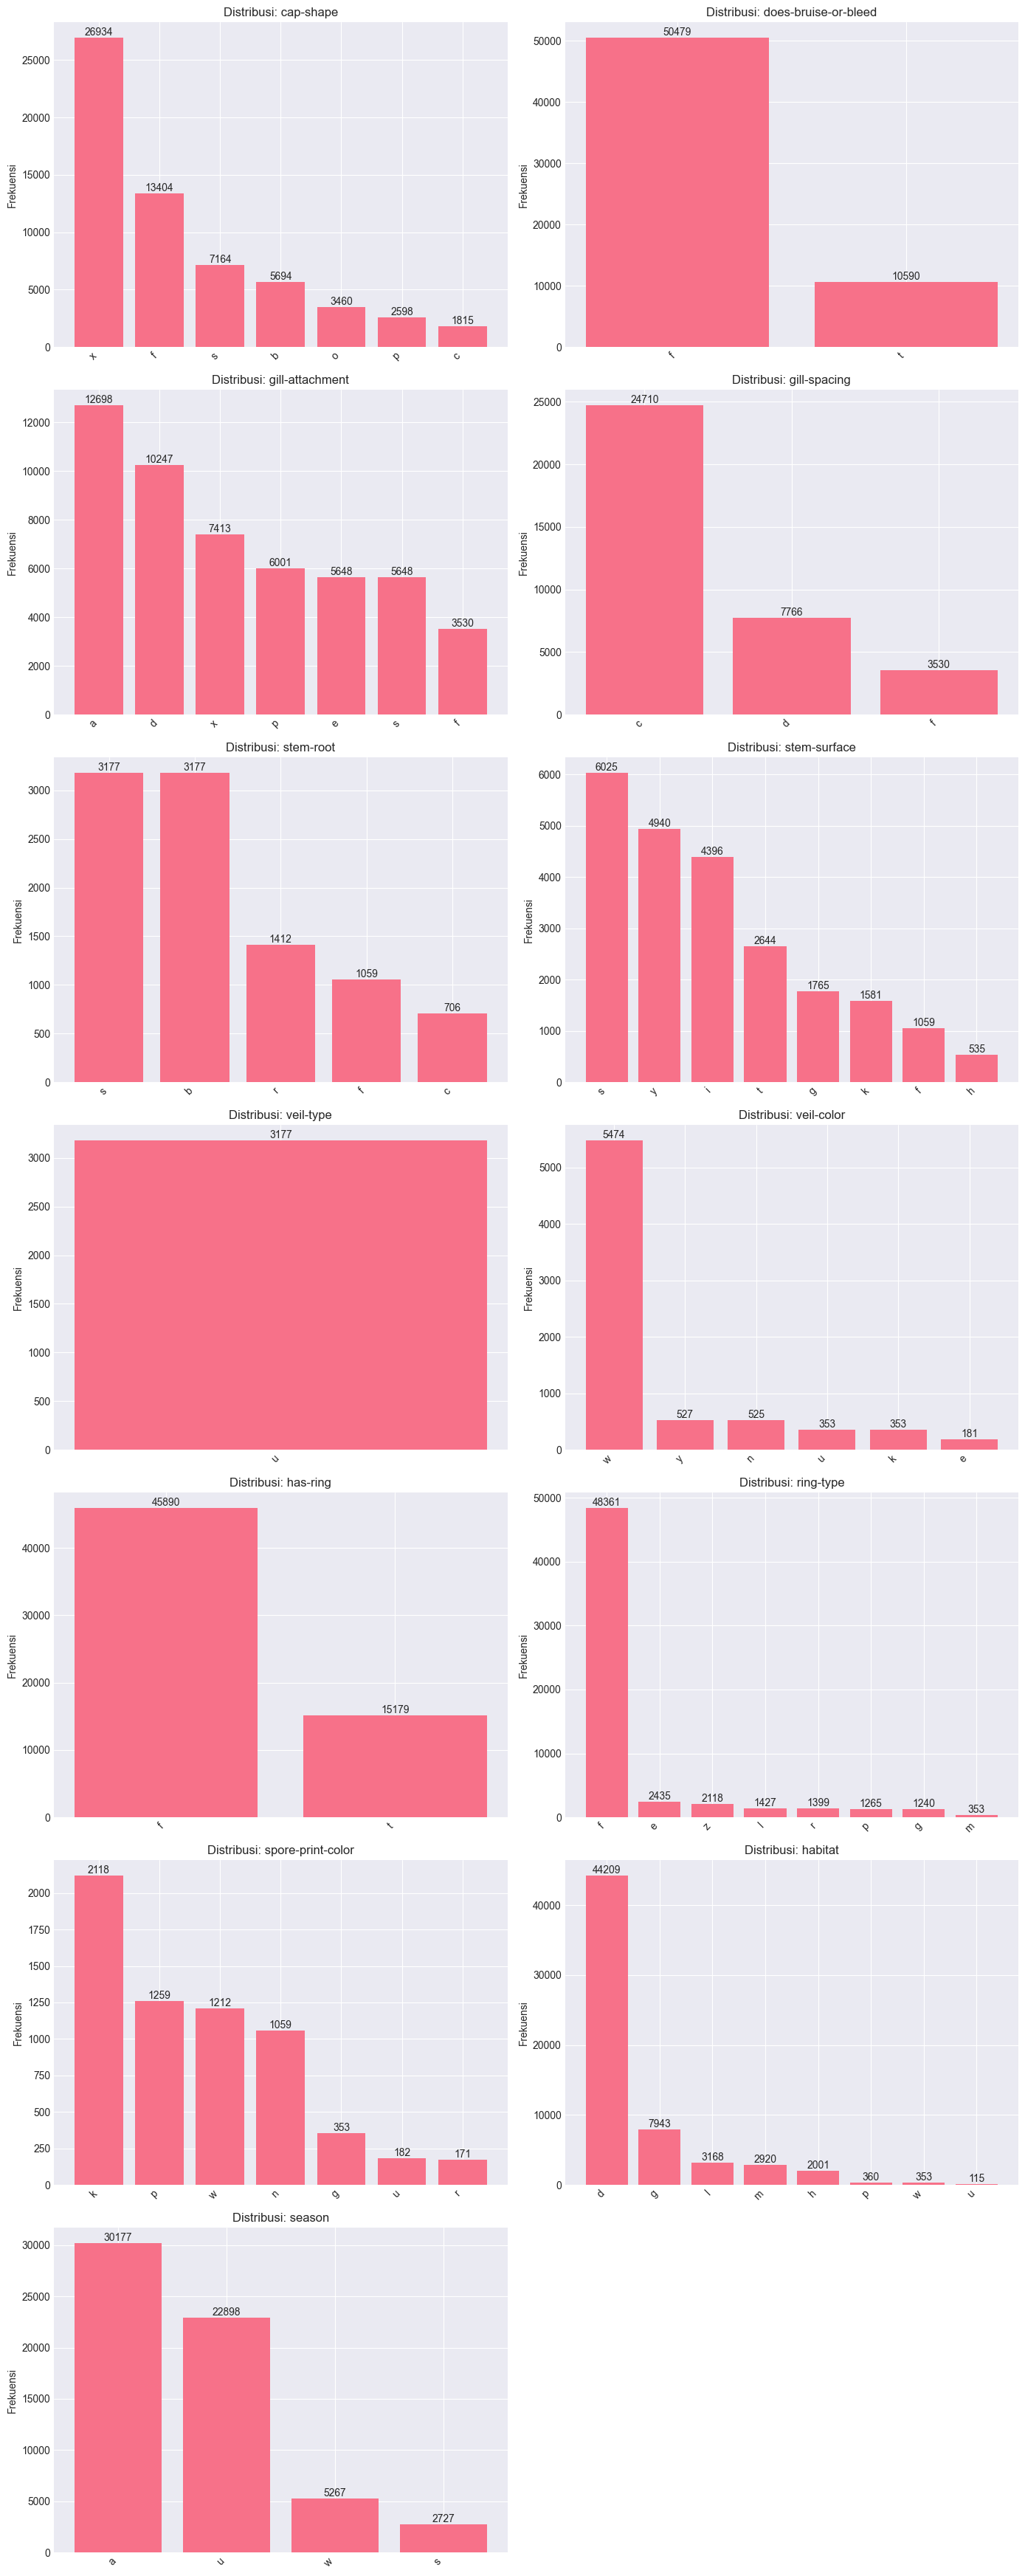

In [12]:
# Identifikasi kolom kategorikal (kecuali target)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if target_col in categorical_cols:
    categorical_cols.remove(target_col)

print("=" * 80)
print("📊 ANALISIS FITUR KATEGORIKAL")
print("=" * 80)

if len(categorical_cols) > 0:
    print(f"\nJumlah fitur kategorikal: {len(categorical_cols)}\n")
    
    # Ringkasan untuk setiap fitur kategorikal
    cat_summary = []
    for col in categorical_cols:
        n_unique = df[col].nunique()
        most_common = df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A'
        most_common_count = df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0
        
        cat_summary.append({
            'Kolom': col,
            'Unique Values': n_unique,
            'Most Common': most_common,
            'Most Common Count': most_common_count,
            'Most Common %': f'{(most_common_count/len(df)*100):.2f}%'
        })
    
    display(pd.DataFrame(cat_summary))
    
    # Visualisasi distribusi untuk fitur kategorikal dengan unique values <= 10
    visualize_cols = [col for col in categorical_cols if df[col].nunique() <= 10]
    
    if len(visualize_cols) > 0:
        print(f"\n📊 Visualisasi distribusi untuk {len(visualize_cols)} fitur kategorikal:")
        
        n_cols = min(2, len(visualize_cols))
        n_rows = (len(visualize_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5*n_rows))
        if n_rows * n_cols > 1:
            axes = axes.flatten()
        else:
            axes = [axes]
        
        for idx, col in enumerate(visualize_cols):
            value_counts = df[col].value_counts()
            axes[idx].bar(range(len(value_counts)), value_counts.values)
            axes[idx].set_xticks(range(len(value_counts)))
            axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
            axes[idx].set_title(f'Distribusi: {col}')
            axes[idx].set_ylabel('Frekuensi')
            
            # Tambahkan label nilai
            for i, v in enumerate(value_counts.values):
                axes[idx].text(i, v, str(v), ha='center', va='bottom')
        
        # Sembunyikan subplot kosong
        for idx in range(len(visualize_cols), n_rows*n_cols):
            axes[idx].axis('off')
        
        plt.tight_layout()
        plt.show()
else:
    print("\nℹ️ Tidak ada fitur kategorikal dalam dataset (selain target).")

### 5.4 Hubungan Fitur dengan Target Variable

🔗 HUBUNGAN FITUR DENGAN TARGET: class

📈 Fitur Numerik vs Target:



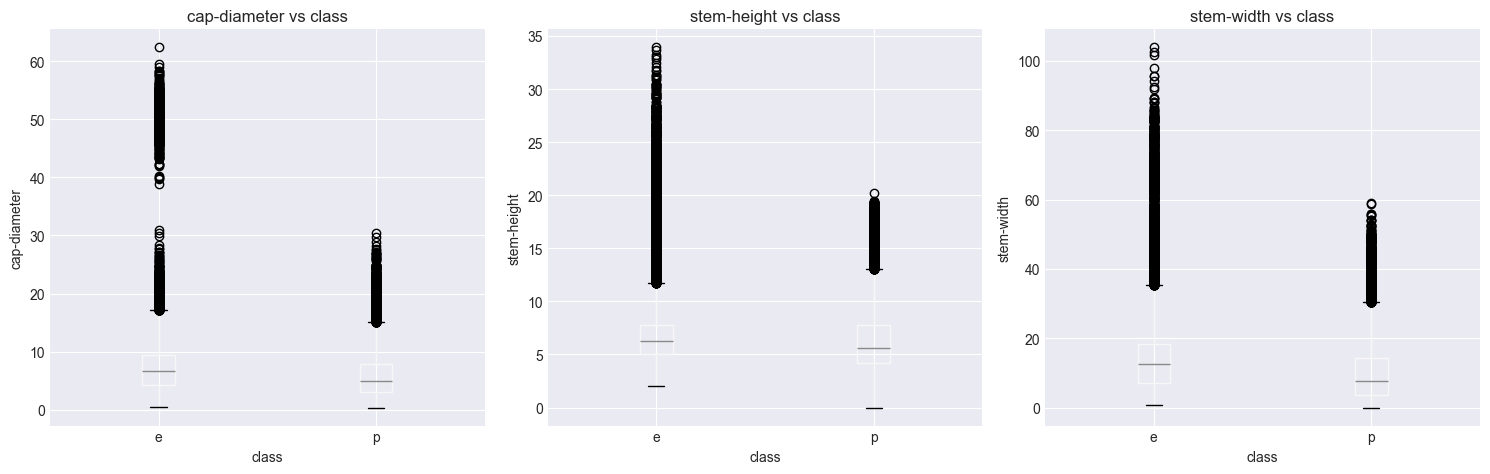


📊 Fitur Kategorikal vs Target (Chi-Square Test):



,Fitur,Chi-Square,P-Value,Signifikan
0,cap-shape,2257.1731,0.000000,✅ Ya
1,cap-surface,3135.1587,0.000000,✅ Ya
2,cap-color,3541.0798,0.000000,✅ Ya
3,does-bruise-or-bleed,24.0511,0.000001,✅ Ya
4,gill-attachment,2707.7384,0.000000,✅ Ya
5,gill-spacing,785.5709,0.000000,✅ Ya
6,gill-color,2245.0489,0.000000,✅ Ya
7,stem-root,3139.6235,0.000000,✅ Ya
8,stem-surface,3382.1486,0.000000,✅ Ya
9,stem-color,4557.8906,0.000000,✅ Ya



💡 Interpretasi:
   - P-Value < 0.05: Hubungan signifikan antara fitur dan target
   - P-Value ≥ 0.05: Tidak ada hubungan signifikan


In [13]:
print("=" * 80)
print(f"🔗 HUBUNGAN FITUR DENGAN TARGET: {target_col}")
print("=" * 80)

# Untuk fitur numerik vs target
if len(numeric_cols) > 0:
    print("\n📈 Fitur Numerik vs Target:\n")
    
    # Encode target jika kategorikal
    if df[target_col].dtype == 'object':
        le_target = LabelEncoder()
        target_encoded = le_target.fit_transform(df[target_col])
    else:
        target_encoded = df[target_col]
    
    # Visualisasi boxplot
    visualize_num_cols = numeric_cols[:min(6, len(numeric_cols))]  # Max 6 kolom
    
    if len(visualize_num_cols) > 0:
        n_cols = min(3, len(visualize_num_cols))
        n_rows = (len(visualize_num_cols) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        if n_rows * n_cols > 1:
            axes = axes.flatten()
        else:
            axes = [axes]
        
        for idx, col in enumerate(visualize_num_cols):
            df.boxplot(column=col, by=target_col, ax=axes[idx])
            axes[idx].set_title(f'{col} vs {target_col}')
            axes[idx].set_xlabel(target_col)
            axes[idx].set_ylabel(col)
        
        # Sembunyikan subplot kosong
        for idx in range(len(visualize_num_cols), n_rows*n_cols):
            axes[idx].axis('off')
        
        plt.suptitle('')  # Hapus title default dari boxplot
        plt.tight_layout()
        plt.show()

# Untuk fitur kategorikal vs target
if len(categorical_cols) > 0 and df[target_col].dtype == 'object':
    print("\n📊 Fitur Kategorikal vs Target (Chi-Square Test):\n")
    
    chi2_results = []
    for col in categorical_cols[:10]:  # Max 10 kolom
        # Buat contingency table
        contingency_table = pd.crosstab(df[col], df[target_col])
        
        # Chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        chi2_results.append({
            'Fitur': col,
            'Chi-Square': f'{chi2:.4f}',
            'P-Value': f'{p_value:.6f}',
            'Signifikan': '✅ Ya' if p_value < 0.05 else '❌ Tidak'
        })
    
    chi2_df = pd.DataFrame(chi2_results)
    display(chi2_df)
    
    print("\n💡 Interpretasi:")
    print("   - P-Value < 0.05: Hubungan signifikan antara fitur dan target")
    print("   - P-Value ≥ 0.05: Tidak ada hubungan signifikan")

## 🔧 6. Data Preprocessing

Pada tahap ini, kita akan mempersiapkan data untuk modeling dengan:
1. Membagi data (2000 untuk training/validation, sisanya untuk testing tambahan)
2. Menangani missing values (jika ada)
3. Encoding fitur kategorikal
4. Feature scaling
5. Handling class imbalance (jika diperlukan)

### 6.1 Pembagian Data: 2000 sampel vs Sisanya (Stratified)

**Strategi**: Menggunakan **Stratified Sampling** untuk membagi data menjadi 2 bagian:
- 2000 sampel untuk training dan validation (dengan K-Fold CV)
- Sisanya sebagai test set tambahan

**Alasan**: Stratified sampling memastikan proporsi kelas target tetap terjaga di kedua set (data utama dan extra test), sehingga evaluasi model lebih representatif dan tidak bias terhadap kelas tertentu.

In [14]:
print("=" * 80)
print("✂️ PEMBAGIAN DATA")
print("=" * 80)

# Pisahkan fitur dan target
X_all = df.drop(columns=[target_col])
y_all = df[target_col]

print(f"\n📊 Total data: {len(df)} sampel")
print(f"   - Fitur: {X_all.shape[1]} kolom")
print(f"   - Target: {target_col}")

# Tentukan ukuran data utama
n_main = min(2000, len(df))
n_extra = max(0, len(df) - n_main)

# Stratified sampling untuk mempertahankan proporsi kelas
if len(df) <= 2000:
    # Jika total data <= 2000, gunakan semua data untuk training/validation
    X_main = X_all.copy()
    y_main = y_all.copy()
    X_extra_test = None
    y_extra_test = None
    
    print(f"\n📦 Pembagian Data:")
    print(f"   1. Data Utama (Training & Validation): {n_main} sampel")
    print(f"   2. Data Extra Test: Tidak ada (total data ≤ 2000)")
else:
    # Gunakan stratified split untuk mempertahankan proporsi kelas
    from sklearn.model_selection import train_test_split
    
    # Hitung proporsi untuk data utama
    test_size = (len(df) - 2000) / len(df)
    
    X_main, X_extra_test, y_main, y_extra_test = train_test_split(
        X_all, y_all, 
        test_size=test_size,
        stratify=y_all,
        random_state=RANDOM_STATE
    )
    
    print(f"\n📦 Pembagian Data (Stratified Sampling):")
    print(f"   1. Data Utama (Training & Validation): {len(X_main)} sampel")
    print(f"   2. Data Extra Test: {len(X_extra_test)} sampel")
    print(f"   ✅ Stratified sampling memastikan proporsi kelas terjaga di kedua set")

# Cek distribusi target di data utama
print(f"\n🎯 Distribusi Target di Data Utama:")
target_dist_main = y_main.value_counts()
target_dist_main_pct = y_main.value_counts(normalize=True) * 100
for cls, count in target_dist_main.items():
    pct = target_dist_main_pct[cls]
    print(f"   {cls}: {count} ({pct:.2f}%)")

if X_extra_test is not None:
    print(f"\n🎯 Distribusi Target di Data Extra Test:")
    target_dist_extra = y_extra_test.value_counts()
    target_dist_extra_pct = y_extra_test.value_counts(normalize=True) * 100
    for cls, count in target_dist_extra.items():
        pct = target_dist_extra_pct[cls]
        print(f"   {cls}: {count} ({pct:.2f}%)")
    
    # Verifikasi kesamaan proporsi
    print(f"\n✅ Verifikasi Proporsi Kelas:")
    for cls in target_dist_main.index:
        main_pct = target_dist_main_pct[cls]
        extra_pct = target_dist_extra_pct[cls] if cls in target_dist_extra_pct.index else 0
        diff = abs(main_pct - extra_pct)
        print(f"   {cls}: Utama={main_pct:.2f}% | Extra={extra_pct:.2f}% | Diff={diff:.2f}%")

✂️ PEMBAGIAN DATA

📊 Total data: 61069 sampel
   - Fitur: 20 kolom
   - Target: class

📦 Pembagian Data (Stratified Sampling):
   1. Data Utama (Training & Validation): 2000 sampel
   2. Data Extra Test: 59069 sampel
   ✅ Stratified sampling memastikan proporsi kelas terjaga di kedua set

🎯 Distribusi Target di Data Utama:
   p: 1110 (55.50%)
   e: 890 (44.50%)

🎯 Distribusi Target di Data Extra Test:
   p: 32778 (55.49%)
   e: 26291 (44.51%)

✅ Verifikasi Proporsi Kelas:
   p: Utama=55.50% | Extra=55.49% | Diff=0.01%
   e: Utama=44.50% | Extra=44.51% | Diff=0.01%


### 6.2 Handling Missing Values

**Strategi**: 
- Untuk fitur numerik: Imputasi dengan median (lebih robust terhadap outlier)
- Untuk fitur kategorikal: Imputasi dengan modus (nilai paling sering muncul)

In [15]:
print("=" * 80)
print("🔧 HANDLING MISSING VALUES")
print("=" * 80)

# Cek missing values di X_main
missing_main = X_main.isnull().sum().sum()
print(f"\n📊 Missing values di data utama: {missing_main}")

if missing_main > 0:
    print("\n⚙️ Melakukan imputasi...")
    
    # Identifikasi kolom numerik dan kategorikal di X_main
    num_cols_main = X_main.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols_main = X_main.select_dtypes(include=['object']).columns.tolist()
    
    # Imputasi numerik dengan median
    if len(num_cols_main) > 0:
        imputer_num = SimpleImputer(strategy='median')
        X_main[num_cols_main] = imputer_num.fit_transform(X_main[num_cols_main])
        print(f"   ✅ Imputasi {len(num_cols_main)} kolom numerik dengan median")
    
    # Imputasi kategorikal dengan modus
    if len(cat_cols_main) > 0:
        imputer_cat = SimpleImputer(strategy='most_frequent')
        X_main[cat_cols_main] = imputer_cat.fit_transform(X_main[cat_cols_main])
        print(f"   ✅ Imputasi {len(cat_cols_main)} kolom kategorikal dengan modus")
    
    # Terapkan imputasi yang sama ke data extra test
    if X_extra_test is not None:
        if len(num_cols_main) > 0:
            X_extra_test[num_cols_main] = imputer_num.transform(X_extra_test[num_cols_main])
        if len(cat_cols_main) > 0:
            X_extra_test[cat_cols_main] = imputer_cat.transform(X_extra_test[cat_cols_main])
        print(f"   ✅ Imputasi diterapkan ke data extra test")
    
    # Verifikasi
    print(f"\n✅ Setelah imputasi:")
    print(f"   - Missing values di data utama: {X_main.isnull().sum().sum()}")
    if X_extra_test is not None:
        print(f"   - Missing values di data extra test: {X_extra_test.isnull().sum().sum()}")
else:
    print("\n✅ Tidak ada missing values yang perlu ditangani!")

🔧 HANDLING MISSING VALUES

📊 Missing values di data utama: 10106

⚙️ Melakukan imputasi...
   ✅ Imputasi 3 kolom numerik dengan median
   ✅ Imputasi 17 kolom kategorikal dengan modus
   ✅ Imputasi diterapkan ke data extra test

✅ Setelah imputasi:
   - Missing values di data utama: 0
   - Missing values di data extra test: 0
   ✅ Imputasi diterapkan ke data extra test

✅ Setelah imputasi:
   - Missing values di data utama: 0
   - Missing values di data extra test: 0


### 6.3 Encoding Fitur Kategorikal

**Catatan Penting**: Dataset Secondary Mushroom dari UCI Repository sudah dalam bentuk numerik (sudah ter-encode). Jika dataset Anda memiliki fitur kategorikal (tipe 'object' atau 'category'), maka One-Hot Encoding akan diterapkan.

**Strategi**: Menggunakan One-Hot Encoding untuk fitur kategorikal.
**Alasan**: One-Hot Encoding tidak mengasumsikan hubungan ordinal antar kategori, lebih cocok untuk semua jenis model (tree-based maupun linear), dan mencegah model salah menginterpretasi jarak antar kategori.

In [16]:
print("=" * 80)
print("🔤 ENCODING FITUR KATEGORIKAL")
print("=" * 80)

# Cek tipe data di dataset asli (X_all)
original_cat_cols = X_all.select_dtypes(include=['object', 'category']).columns.tolist()
original_num_cols = X_all.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n📊 Informasi Dataset Asli (X_all):")
print(f"   - Total kolom: {X_all.shape[1]}")
print(f"   - Kolom numerik: {len(original_num_cols)}")
print(f"   - Kolom kategorikal (object/category): {len(original_cat_cols)}")

if len(original_cat_cols) > 0:
    print(f"\n   Fitur kategorikal yang ditemukan:")
    for col in original_cat_cols[:10]:  # Tampilkan max 10
        print(f"      - {col}")
    if len(original_cat_cols) > 10:
        print(f"      ... dan {len(original_cat_cols) - 10} kolom lainnya")

# Identifikasi kolom kategorikal di X_main
cat_cols_to_encode = X_main.select_dtypes(include=['object', 'category']).columns.tolist()

if len(cat_cols_to_encode) > 0:
    print(f"\n📊 Jumlah fitur kategorikal yang akan di-encode: {len(cat_cols_to_encode)}")
    print(f"   Fitur: {cat_cols_to_encode[:10]}")  # Tampilkan max 10
    if len(cat_cols_to_encode) > 10:
        print(f"   ... dan {len(cat_cols_to_encode) - 10} kolom lainnya")
    
    # One-Hot Encoding menggunakan pd.get_dummies
    print("\n⚙️ Melakukan One-Hot Encoding...")
    
    # Simpan shape awal
    original_shape = X_main.shape
    
    # One-Hot Encoding untuk data utama
    X_main_encoded = pd.get_dummies(X_main, columns=cat_cols_to_encode, drop_first=True, dtype=int)
    
    # Untuk data extra test, pastikan kolom yang sama
    if X_extra_test is not None:
        X_extra_test_encoded = pd.get_dummies(X_extra_test, columns=cat_cols_to_encode, drop_first=True, dtype=int)
        
        # Align kolom antara train dan test
        # Tambahkan kolom yang missing dengan nilai 0
        for col in X_main_encoded.columns:
            if col not in X_extra_test_encoded.columns:
                X_extra_test_encoded[col] = 0
        
        # Hapus kolom extra yang tidak ada di train
        X_extra_test_encoded = X_extra_test_encoded[X_main_encoded.columns]
        
        X_extra_test = X_extra_test_encoded
    
    X_main = X_main_encoded
    
    print(f"\n✅ One-Hot Encoding selesai!")
    print(f"   - Shape sebelum encoding: {original_shape}")
    print(f"   - Shape setelah encoding: {X_main.shape}")
    print(f"   - Jumlah fitur bertambah: {X_main.shape[1] - original_shape[1]} kolom")
    print(f"   - Total fitur sekarang: {X_main.shape[1]} kolom")
    
    if X_extra_test is not None:
        print(f"   - Shape X_extra_test: {X_extra_test.shape}")
    
    print(f"\n💡 Keuntungan One-Hot Encoding:")
    print(f"   - Tidak ada asumsi ordinal antar kategori")
    print(f"   - Cocok untuk semua jenis model (tree-based & linear)")
    print(f"   - Model tidak salah menginterpretasi jarak antar kategori")
else:
    print(f"\n✅ Dataset sudah dalam bentuk numerik (tidak ada fitur kategorikal).")
    print(f"   - Total fitur: {X_main.shape[1]} kolom")
    print(f"   - Semua fitur siap untuk digunakan dalam modeling")
    print(f"\n💡 Catatan:")
    print(f"   Dataset Secondary Mushroom dari UCI Repository umumnya sudah")
    print(f"   dalam format numerik (sudah ter-encode) sehingga dapat langsung")
    print(f"   digunakan untuk machine learning tanpa perlu encoding tambahan.")

# Encode target variable jika kategorikal (tetap pakai Label Encoding)
print(f"\n{'='*80}")
print(f"🎯 ENCODING TARGET VARIABLE")
print(f"{'='*80}")

if y_main.dtype == 'object' or str(y_main.dtype) == 'category':
    le_target = LabelEncoder()
    y_main_encoded = le_target.fit_transform(y_main)
    
    if y_extra_test is not None:
        y_extra_test_encoded = le_target.transform(y_extra_test)
    else:
        y_extra_test_encoded = None
    
    print(f"\n✅ Target variable '{target_col}' berhasil di-encode (Label Encoding):")
    for idx, cls in enumerate(le_target.classes_):
        print(f"   {cls} → {idx}")
    
    # Update y_main dan y_extra_test
    y_main = y_main_encoded
    y_extra_test = y_extra_test_encoded
    
    # Simpan encoder target untuk reference
    target_encoder = le_target
else:
    print(f"\n✅ Target variable '{target_col}' sudah dalam bentuk numerik.")
    print(f"   - Tipe data: {y_main.dtype}")
    print(f"   - Unique values: {sorted(np.unique(y_main))}")
    
    target_encoder = None
    
    # Convert to numpy array if it's a pandas Series
    if hasattr(y_main, 'values'):
        y_main = y_main.values
    if y_extra_test is not None and hasattr(y_extra_test, 'values'):
        y_extra_test = y_extra_test.values

🔤 ENCODING FITUR KATEGORIKAL

📊 Informasi Dataset Asli (X_all):
   - Total kolom: 20
   - Kolom numerik: 3
   - Kolom kategorikal (object/category): 17

   Fitur kategorikal yang ditemukan:
      - cap-shape
      - cap-surface
      - cap-color
      - does-bruise-or-bleed
      - gill-attachment
      - gill-spacing
      - gill-color
      - stem-root
      - stem-surface
      - stem-color
      ... dan 7 kolom lainnya

📊 Jumlah fitur kategorikal yang akan di-encode: 17
   Fitur: ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color']
   ... dan 7 kolom lainnya

⚙️ Melakukan One-Hot Encoding...

✅ One-Hot Encoding selesai!
   - Shape sebelum encoding: (2000, 20)
   - Shape setelah encoding: (2000, 102)
   - Jumlah fitur bertambah: 82 kolom
   - Total fitur sekarang: 102 kolom
   - Shape X_extra_test: (59069, 102)

💡 Keuntungan One-Hot Encoding:
   - Tidak ada asumsi ordinal antar k

### 6.4 Feature Scaling

**Strategi**: Menggunakan StandardScaler untuk normalisasi fitur.
**Alasan**: Memastikan semua fitur memiliki skala yang sama, penting untuk model seperti SVM, Logistic Regression, dan KNN.

In [17]:
print("=" * 80)
print("⚖️ FEATURE SCALING")
print("=" * 80)

# Buat scaler
scaler = StandardScaler()

# Fit dan transform data utama
X_main_scaled = scaler.fit_transform(X_main)

# Transform data extra test
if X_extra_test is not None:
    X_extra_test_scaled = scaler.transform(X_extra_test)
else:
    X_extra_test_scaled = None

print(f"\n✅ Feature scaling selesai menggunakan StandardScaler")
print(f"\n📊 Statistik setelah scaling (data utama):")
print(f"   - Mean ≈ 0: {np.abs(X_main_scaled.mean(axis=0)).max():.6f}")
print(f"   - Std ≈ 1: {np.abs(X_main_scaled.std(axis=0) - 1).max():.6f}")

# Simpan nama kolom untuk referensi
feature_names = X_main.columns.tolist()
print(f"\n📋 Total fitur setelah preprocessing: {len(feature_names)}")

⚖️ FEATURE SCALING

✅ Feature scaling selesai menggunakan StandardScaler

📊 Statistik setelah scaling (data utama):
   - Mean ≈ 0: 0.000000
   - Std ≈ 1: 0.000000

📋 Total fitur setelah preprocessing: 102

✅ Feature scaling selesai menggunakan StandardScaler

📊 Statistik setelah scaling (data utama):
   - Mean ≈ 0: 0.000000
   - Std ≈ 1: 0.000000

📋 Total fitur setelah preprocessing: 102


## 🤖 7. Model Training dan Evaluasi

Pada bagian ini, kita akan:
1. Melatih berbagai algoritma machine learning
2. Menggunakan **Stratified K-Fold Cross-Validation** untuk evaluasi yang robust
3. Membandingkan performa model
4. Memilih model terbaik

**Algoritma yang akan diuji**:
- Random Forest
- Gradient Boosting
- Decision Tree
- Logistic Regression
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Naive Bayes
- AdaBoost

### 7.1 Setup Model dan Cross-Validation

**Strategi Validasi**: Stratified 5-Fold Cross-Validation
- **Alasan**: Mempertahankan proporsi kelas di setiap fold, memberikan estimasi performa yang lebih reliable
- **5 Folds**: Balance antara bias-variance dan computational cost

In [18]:
print("=" * 80)
print("🎯 SETUP MODEL DAN CROSS-VALIDATION")
print("=" * 80)

# Definisikan models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=RANDOM_STATE),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    'SVM': SVC(random_state=RANDOM_STATE, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=RANDOM_STATE, algorithm='SAMME')
}

# Setup Stratified K-Fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)

print(f"\n📊 Jumlah model: {len(models)}")
print(f"🔄 Cross-Validation: Stratified {n_splits}-Fold")
print(f"📏 Metrik evaluasi: Accuracy, Precision, Recall, F1-Score")
print(f"\n⏳ Training dimulai...\n")

🎯 SETUP MODEL DAN CROSS-VALIDATION

📊 Jumlah model: 8
🔄 Cross-Validation: Stratified 5-Fold
📏 Metrik evaluasi: Accuracy, Precision, Recall, F1-Score

⏳ Training dimulai...



### 7.2 Training dan Evaluasi dengan K-Fold Cross-Validation

In [19]:
import time

# Dictionary untuk menyimpan hasil
cv_results = {}
trained_models = {}

# Loop through each model
for model_name, model in models.items():
    print(f"{'='*80}")
    print(f"🔄 Training: {model_name}")
    print(f"{'='*80}")
    
    start_time = time.time()
    
    # Arrays untuk menyimpan scores dari setiap fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    # Cross-validation
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_main_scaled, y_main), 1):
        # Split data
        X_train_fold = X_main_scaled[train_idx]
        X_val_fold = X_main_scaled[val_idx]
        y_train_fold = y_main[train_idx]
        y_val_fold = y_main[val_idx]
        
        # Train model
        model.fit(X_train_fold, y_train_fold)
        
        # Predict
        y_pred_fold = model.predict(X_val_fold)
        
        # Calculate metrics
        acc = accuracy_score(y_val_fold, y_pred_fold)
        prec = precision_score(y_val_fold, y_pred_fold, average='weighted', zero_division=0)
        rec = recall_score(y_val_fold, y_pred_fold, average='weighted', zero_division=0)
        f1 = f1_score(y_val_fold, y_pred_fold, average='weighted', zero_division=0)
        
        accuracy_scores.append(acc)
        precision_scores.append(prec)
        recall_scores.append(rec)
        f1_scores.append(f1)
        
        print(f"   Fold {fold}: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}")
    
    # Calculate mean and std
    mean_acc = np.mean(accuracy_scores)
    std_acc = np.std(accuracy_scores)
    mean_prec = np.mean(precision_scores)
    mean_rec = np.mean(recall_scores)
    mean_f1 = np.mean(f1_scores)
    
    elapsed_time = time.time() - start_time
    
    print(f"\n   📊 Mean Scores:")
    print(f"      Accuracy:  {mean_acc:.4f} (±{std_acc:.4f})")
    print(f"      Precision: {mean_prec:.4f}")
    print(f"      Recall:    {mean_rec:.4f}")
    print(f"      F1-Score:  {mean_f1:.4f}")
    print(f"   ⏱️ Time: {elapsed_time:.2f}s")
    
    # Simpan hasil
    cv_results[model_name] = {
        'accuracy_mean': mean_acc,
        'accuracy_std': std_acc,
        'precision_mean': mean_prec,
        'recall_mean': mean_rec,
        'f1_mean': mean_f1,
        'time': elapsed_time
    }
    
    # Train model pada seluruh data utama untuk final model
    model.fit(X_main_scaled, y_main)
    trained_models[model_name] = model
    
    print()

print("=" * 80)
print("✅ TRAINING SELESAI!")
print("=" * 80)

🔄 Training: Random Forest
   Fold 1: Acc=0.9975, Prec=0.9975, Rec=0.9975, F1=0.9975
   Fold 1: Acc=0.9975, Prec=0.9975, Rec=0.9975, F1=0.9975
   Fold 2: Acc=0.9850, Prec=0.9852, Rec=0.9850, F1=0.9850
   Fold 2: Acc=0.9850, Prec=0.9852, Rec=0.9850, F1=0.9850
   Fold 3: Acc=0.9950, Prec=0.9950, Rec=0.9950, F1=0.9950
   Fold 3: Acc=0.9950, Prec=0.9950, Rec=0.9950, F1=0.9950
   Fold 4: Acc=0.9925, Prec=0.9926, Rec=0.9925, F1=0.9925
   Fold 4: Acc=0.9925, Prec=0.9926, Rec=0.9925, F1=0.9925
   Fold 5: Acc=0.9875, Prec=0.9876, Rec=0.9875, F1=0.9875

   📊 Mean Scores:
      Accuracy:  0.9915 (±0.0046)
      Precision: 0.9916
      Recall:    0.9915
      F1-Score:  0.9915
   ⏱️ Time: 0.83s
   Fold 5: Acc=0.9875, Prec=0.9876, Rec=0.9875, F1=0.9875

   📊 Mean Scores:
      Accuracy:  0.9915 (±0.0046)
      Precision: 0.9916
      Recall:    0.9915
      F1-Score:  0.9915
   ⏱️ Time: 0.83s

🔄 Training: Gradient Boosting

🔄 Training: Gradient Boosting
   Fold 1: Acc=0.9000, Prec=0.8999, Rec=0.9000

### 7.3 Perbandingan Performa Model

📊 RINGKASAN PERFORMA MODEL (Cross-Validation)


,accuracy_mean,accuracy_std,precision_mean,recall_mean,f1_mean,time
Random Forest,0.991500,0.004637,0.991582,0.991500,0.991492,0.825128
Decision Tree,0.956500,0.014967,0.956674,0.956500,0.956480,0.074252
KNN,0.948000,0.009274,0.949073,0.948000,0.947935,1.398139
SVM,0.946000,0.010075,0.947349,0.946000,0.946067,2.144310
Gradient Boosting,0.906000,0.013838,0.907281,0.906000,0.905980,1.633946
Logistic Regression,0.823500,0.018276,0.824812,0.823500,0.823647,0.086134
AdaBoost,0.694000,0.014799,0.692999,0.694000,0.691385,0.669536
Naive Bayes,0.599000,0.025524,0.780271,0.599000,0.548573,0.036416


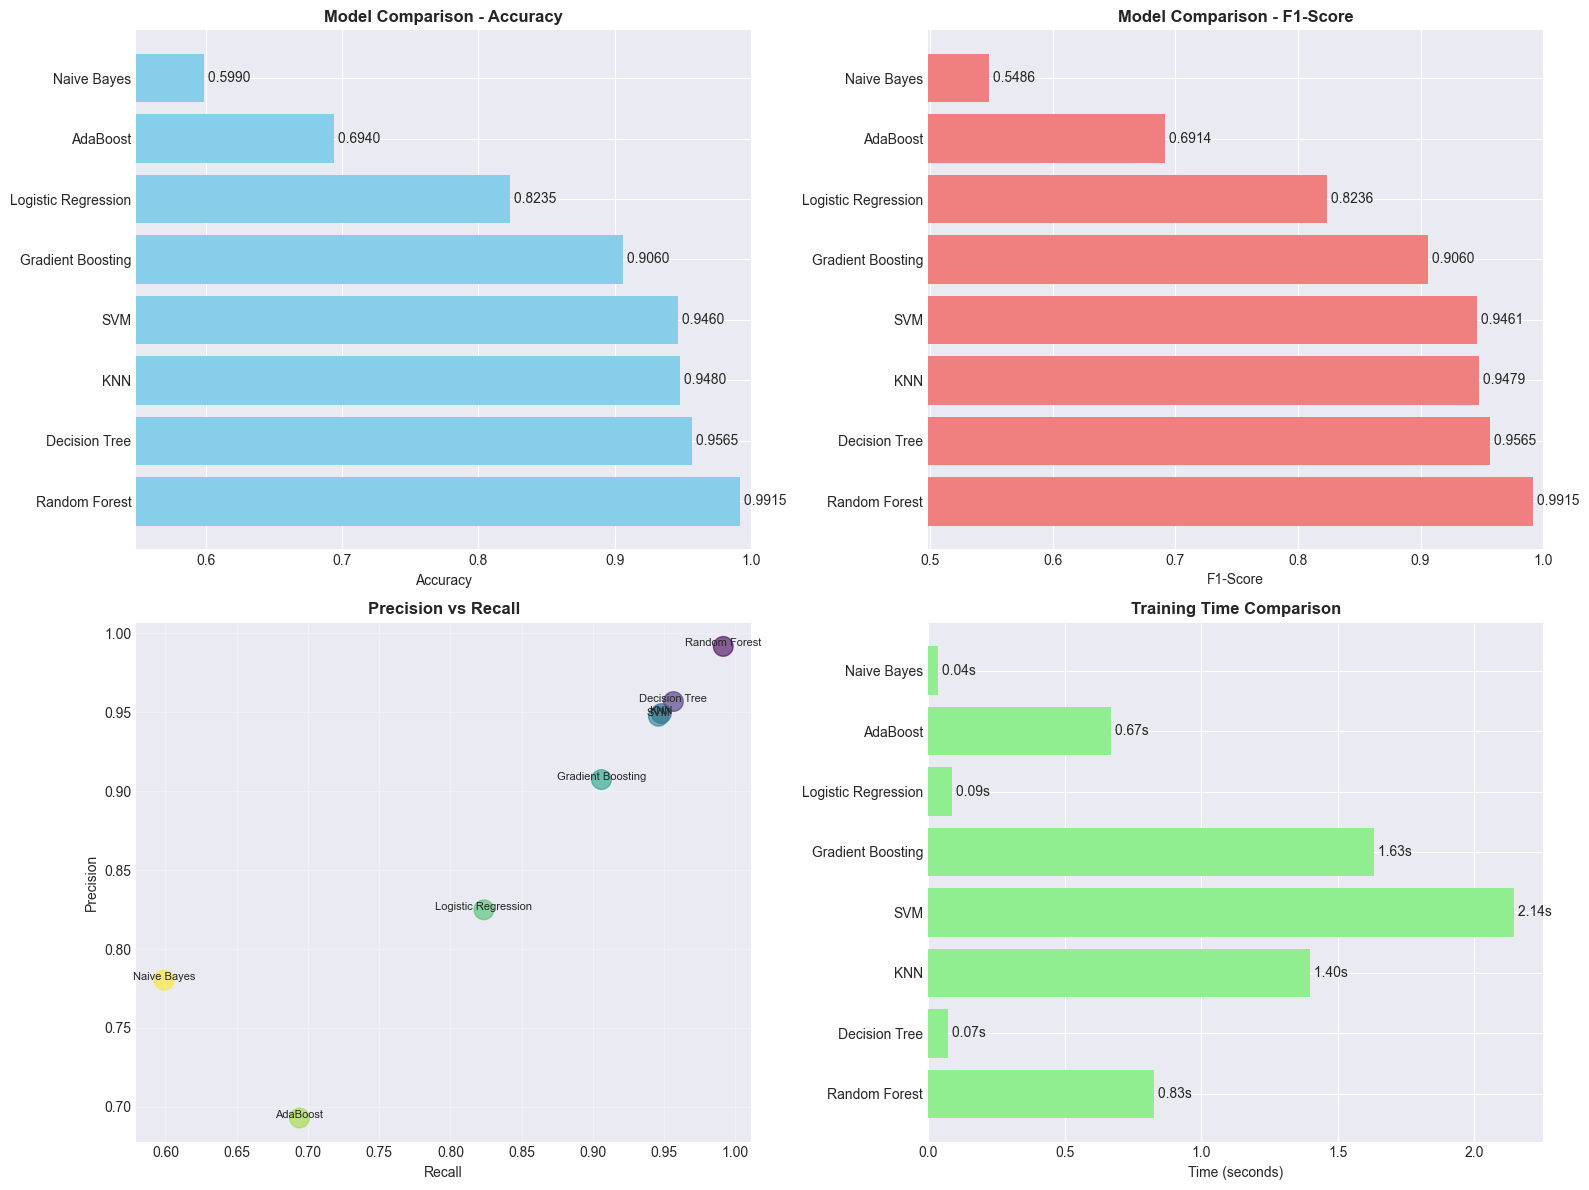


🏆 MODEL TERBAIK: Random Forest
   Accuracy: 0.9915 (±0.0046)
   F1-Score: 0.9915


In [20]:
# Buat DataFrame hasil
results_df = pd.DataFrame(cv_results).T
results_df = results_df.sort_values('accuracy_mean', ascending=False)

print("=" * 80)
print("📊 RINGKASAN PERFORMA MODEL (Cross-Validation)")
print("=" * 80)
display(results_df.style.highlight_max(subset=['accuracy_mean', 'precision_mean', 'recall_mean', 'f1_mean'], 
                                       color='lightgreen'))

# Visualisasi perbandingan
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy comparison
axes[0, 0].barh(results_df.index, results_df['accuracy_mean'], color='skyblue')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Model Comparison - Accuracy', fontweight='bold')
axes[0, 0].set_xlim([results_df['accuracy_mean'].min() - 0.05, 1.0])
for i, v in enumerate(results_df['accuracy_mean']):
    axes[0, 0].text(v, i, f' {v:.4f}', va='center')

# 2. F1-Score comparison
axes[0, 1].barh(results_df.index, results_df['f1_mean'], color='lightcoral')
axes[0, 1].set_xlabel('F1-Score')
axes[0, 1].set_title('Model Comparison - F1-Score', fontweight='bold')
axes[0, 1].set_xlim([results_df['f1_mean'].min() - 0.05, 1.0])
for i, v in enumerate(results_df['f1_mean']):
    axes[0, 1].text(v, i, f' {v:.4f}', va='center')

# 3. Precision vs Recall
axes[1, 0].scatter(results_df['recall_mean'], results_df['precision_mean'], 
                   s=200, alpha=0.6, c=range(len(results_df)), cmap='viridis')
for i, model in enumerate(results_df.index):
    axes[1, 0].annotate(model, (results_df['recall_mean'].iloc[i], results_df['precision_mean'].iloc[i]),
                       fontsize=8, ha='center')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision vs Recall', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Training time comparison
axes[1, 1].barh(results_df.index, results_df['time'], color='lightgreen')
axes[1, 1].set_xlabel('Time (seconds)')
axes[1, 1].set_title('Training Time Comparison', fontweight='bold')
for i, v in enumerate(results_df['time']):
    axes[1, 1].text(v, i, f' {v:.2f}s', va='center')

plt.tight_layout()
plt.show()

# Identifikasi model terbaik
best_model_name = results_df.index[0]
print(f"\n🏆 MODEL TERBAIK: {best_model_name}")
print(f"   Accuracy: {results_df.loc[best_model_name, 'accuracy_mean']:.4f} (±{results_df.loc[best_model_name, 'accuracy_std']:.4f})")
print(f"   F1-Score: {results_df.loc[best_model_name, 'f1_mean']:.4f}")

## 📈 8. Analisis Detail Model Terbaik

Pada bagian ini, kita akan menganalisis model terbaik secara mendalam dengan:
1. Confusion Matrix
2. Classification Report
3. ROC Curve dan AUC
4. Feature Importance

### 8.1 Prediksi dan Confusion Matrix

🔍 ANALISIS DETAIL: Random Forest

📊 Confusion Matrix (Training Data):


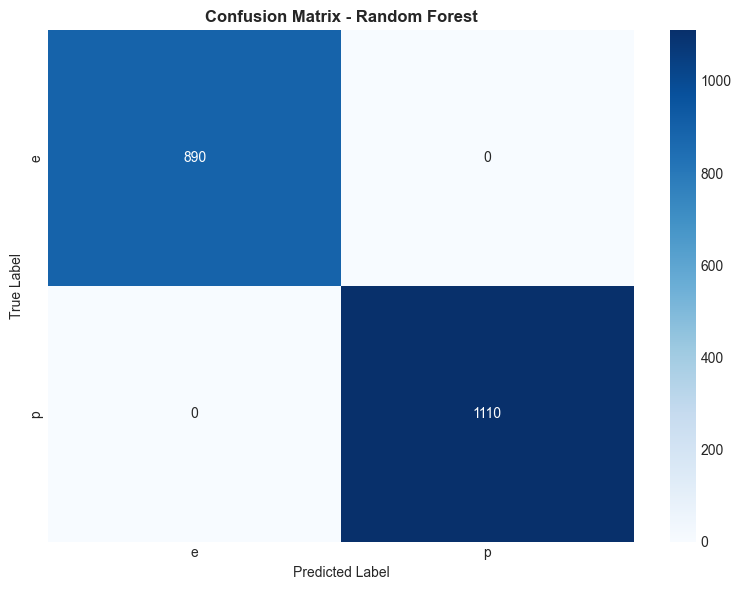


💡 Interpretasi Confusion Matrix:
   True Negatives:  890
   False Positives: 0
   False Negatives: 0
   True Positives:  1110

   Total Correct:   2000 / 2000
   Total Incorrect: 0 / 2000


In [21]:
# Ambil model terbaik
best_model = trained_models[best_model_name]

# Prediksi pada data training (untuk analisis)
y_main_pred = best_model.predict(X_main_scaled)
y_main_pred_proba = best_model.predict_proba(X_main_scaled) if hasattr(best_model, 'predict_proba') else None

print("=" * 80)
print(f"🔍 ANALISIS DETAIL: {best_model_name}")
print("=" * 80)

# Confusion Matrix
cm = confusion_matrix(y_main, y_main_pred)

print(f"\n📊 Confusion Matrix (Training Data):")
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=True)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title(f'Confusion Matrix - {best_model_name}', fontweight='bold')

# Tambahkan label kelas jika ada encoder
if target_encoder is not None:
    ax.set_xticklabels(target_encoder.classes_)
    ax.set_yticklabels(target_encoder.classes_)

plt.tight_layout()
plt.show()

# Interpretasi Confusion Matrix
print(f"\n💡 Interpretasi Confusion Matrix:")
print(f"   True Negatives:  {cm[0,0]}")
print(f"   False Positives: {cm[0,1]}")
print(f"   False Negatives: {cm[1,0]}")
print(f"   True Positives:  {cm[1,1]}")
print(f"\n   Total Correct:   {cm[0,0] + cm[1,1]} / {cm.sum()}")
print(f"   Total Incorrect: {cm[0,1] + cm[1,0]} / {cm.sum()}")

### 8.2 Classification Report

In [22]:
print("=" * 80)
print("📋 CLASSIFICATION REPORT")
print("=" * 80)

# Generate classification report
if target_encoder is not None:
    target_names = target_encoder.classes_
else:
    target_names = None

print(classification_report(y_main, y_main_pred, target_names=target_names))

print("\n💡 Penjelasan Metrik:")
print("   - Precision: Dari semua prediksi positif, berapa yang benar?")
print("   - Recall: Dari semua data positif, berapa yang berhasil diprediksi?")
print("   - F1-Score: Harmonic mean dari Precision dan Recall")
print("   - Support: Jumlah sampel aktual untuk setiap kelas")

📋 CLASSIFICATION REPORT
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       890
           p       1.00      1.00      1.00      1110

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


💡 Penjelasan Metrik:
   - Precision: Dari semua prediksi positif, berapa yang benar?
   - Recall: Dari semua data positif, berapa yang berhasil diprediksi?
   - F1-Score: Harmonic mean dari Precision dan Recall
   - Support: Jumlah sampel aktual untuk setiap kelas


### 8.3 ROC Curve dan AUC Score

📈 ROC CURVE & AUC SCORE


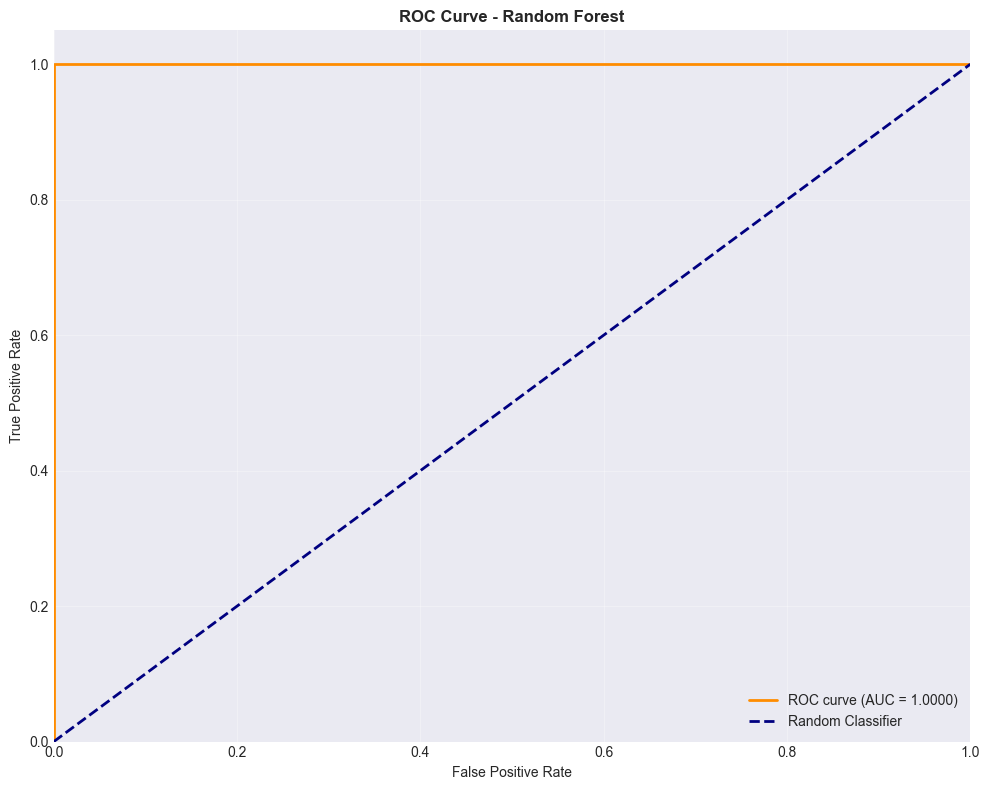


🎯 AUC Score: 1.0000

💡 Interpretasi AUC:
   Excellent (0.9-1.0): Model sangat baik dalam membedakan kelas


In [23]:
if y_main_pred_proba is not None:
    print("=" * 80)
    print("📈 ROC CURVE & AUC SCORE")
    print("=" * 80)
    
    # Untuk binary classification
    if len(np.unique(y_main)) == 2:
        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(y_main, y_main_pred_proba[:, 1])
        roc_auc = roc_auc_score(y_main, y_main_pred_proba[:, 1])
        
        # Plot ROC curve
        plt.figure(figsize=(10, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {best_model_name}', fontweight='bold')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"\n🎯 AUC Score: {roc_auc:.4f}")
        print(f"\n💡 Interpretasi AUC:")
        if roc_auc >= 0.9:
            print("   Excellent (0.9-1.0): Model sangat baik dalam membedakan kelas")
        elif roc_auc >= 0.8:
            print("   Good (0.8-0.9): Model baik dalam membedakan kelas")
        elif roc_auc >= 0.7:
            print("   Fair (0.7-0.8): Model cukup dalam membedakan kelas")
        else:
            print("   Poor (<0.7): Model kurang baik dalam membedakan kelas")
    else:
        # Untuk multiclass
        print("ℹ️ ROC Curve untuk multiclass classification memerlukan pendekatan One-vs-Rest")
        # Bisa dikembangkan jika diperlukan
else:
    print("⚠️ Model tidak mendukung predict_proba, ROC curve tidak dapat dibuat.")

### 8.4 Feature Importance Analysis

Analisis ini membantu kita memahami fitur mana yang paling berpengaruh dalam prediksi model.

🌟 FEATURE IMPORTANCE ANALYSIS

📊 Top 20 Most Important Features:



,Feature,Importance
2,stem-width,0.100296
1,stem-height,0.075556
0,cap-diameter,0.073910
71,stem-color_w,0.031683
34,gill-attachment_p,0.029264
37,gill-spacing_d,0.025492
58,stem-surface_s,0.022758
30,does-bruise-or-bleed_t,0.019500
48,gill-color_w,0.019066
8,cap-shape_x,0.016567


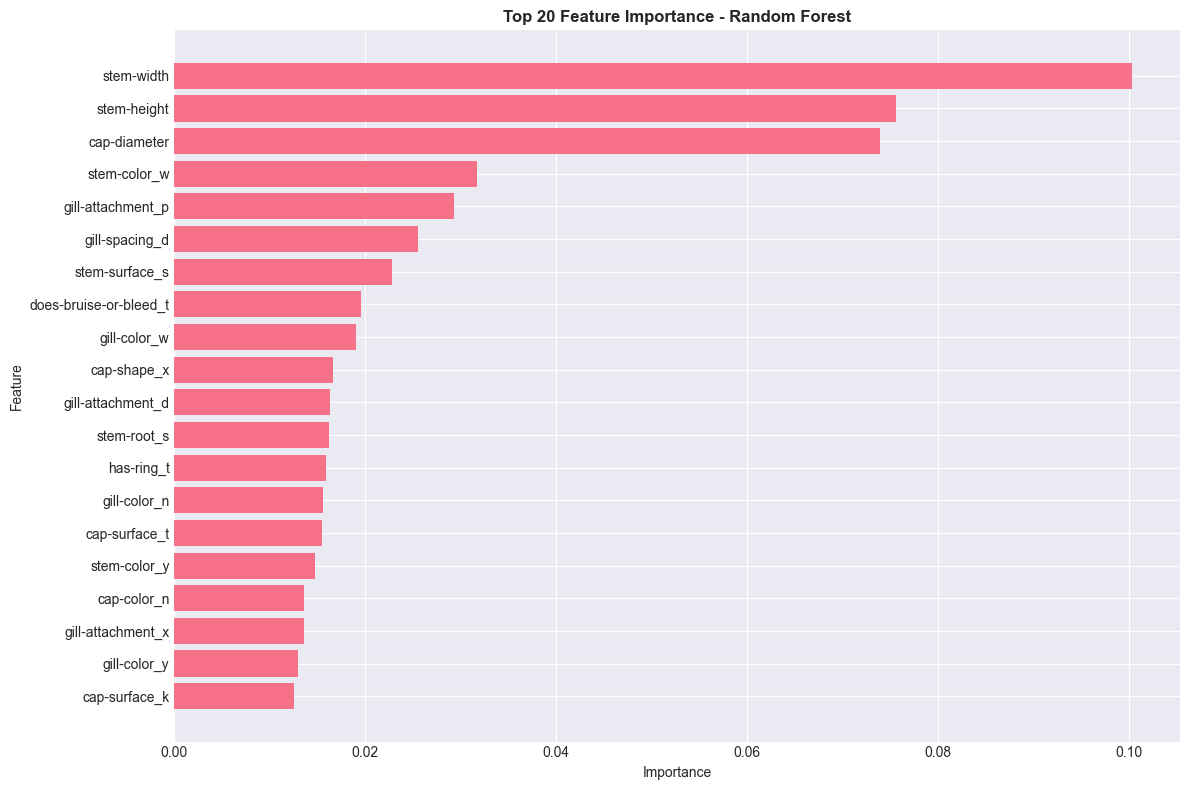


💡 Insights:
   - Fitur paling penting: stem-width
   - Importance score: 0.1003
   - 45 fitur teratas berkontribusi 80% dari total importance


In [24]:
print("=" * 80)
print("🌟 FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Cek apakah model memiliki feature_importances_
if hasattr(best_model, 'feature_importances_'):
    # Ambil feature importance
    importances = best_model.feature_importances_
    
    # Buat DataFrame
    feature_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print(f"\n📊 Top 20 Most Important Features:\n")
    display(feature_imp_df.head(20))
    
    # Visualisasi
    plt.figure(figsize=(12, 8))
    top_n = min(20, len(feature_imp_df))
    plt.barh(range(top_n), feature_imp_df['Importance'].head(top_n))
    plt.yticks(range(top_n), feature_imp_df['Feature'].head(top_n))
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Feature Importance - {best_model_name}', fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    # Analisis
    total_importance = importances.sum()
    cumulative_importance = np.cumsum(feature_imp_df['Importance'].values)
    n_features_80 = np.argmax(cumulative_importance >= 0.8 * total_importance) + 1
    
    print(f"\n💡 Insights:")
    print(f"   - Fitur paling penting: {feature_imp_df.iloc[0]['Feature']}")
    print(f"   - Importance score: {feature_imp_df.iloc[0]['Importance']:.4f}")
    print(f"   - {n_features_80} fitur teratas berkontribusi 80% dari total importance")
    
elif hasattr(best_model, 'coef_'):
    # Untuk model linear (Logistic Regression)
    coefficients = np.abs(best_model.coef_[0])
    
    feature_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values('Coefficient', ascending=False)
    
    print(f"\n📊 Top 20 Features by Coefficient Magnitude:\n")
    display(feature_imp_df.head(20))
    
    # Visualisasi
    plt.figure(figsize=(12, 8))
    top_n = min(20, len(feature_imp_df))
    plt.barh(range(top_n), feature_imp_df['Coefficient'].head(top_n))
    plt.yticks(range(top_n), feature_imp_df['Feature'].head(top_n))
    plt.xlabel('|Coefficient|')
    plt.ylabel('Feature')
    plt.title(f'Top {top_n} Features by Coefficient - {best_model_name}', fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print(f"\n💡 Insights:")
    print(f"   - Fitur dengan koefisien terbesar: {feature_imp_df.iloc[0]['Feature']}")
    print(f"   - Coefficient magnitude: {feature_imp_df.iloc[0]['Coefficient']:.4f}")
else:
    print("\n⚠️ Model tidak mendukung feature importance atau coefficient extraction.")
    print("   Model seperti KNN atau Naive Bayes tidak memiliki konsep feature importance eksplisit.")

## 🧪 9. Testing pada Data Tambahan (Extra Test Set)

**Tujuan**: Memvalidasi performa model terbaik pada data yang benar-benar unseen (tidak digunakan sama sekali dalam training atau cross-validation).

**Alasan**: Ini memberikan estimasi performa generalisasi model yang lebih realistis di dunia nyata.

🧪 TESTING PADA DATA TAMBAHAN (EXTRA TEST SET)

📊 Ukuran Extra Test Set: 59069 sampel
🎯 Model yang digunakan: Random Forest

📈 HASIL EVALUASI PADA EXTRA TEST SET
   Accuracy:  0.9981
   Precision: 0.9981
   Recall:    0.9981
   F1-Score:  0.9981

🔍 PERBANDINGAN:
   CV Accuracy (Training Data):  0.9915
   Test Accuracy (Extra Data):   0.9981
   Difference:                   +0.0066

✅ Model sangat stabil! Performa pada data baru konsisten dengan CV.

📊 Confusion Matrix (Extra Test Data):


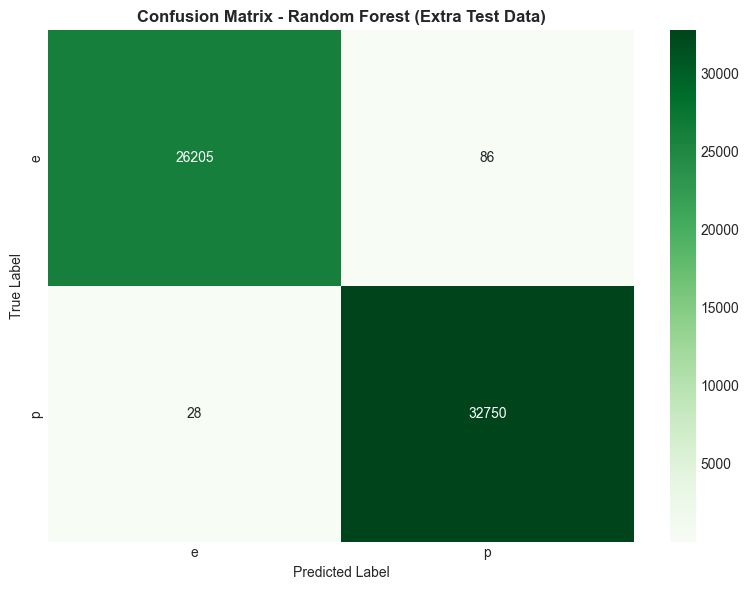


📋 CLASSIFICATION REPORT (EXTRA TEST DATA)
              precision    recall  f1-score   support

           e       1.00      1.00      1.00     26291
           p       1.00      1.00      1.00     32778

    accuracy                           1.00     59069
   macro avg       1.00      1.00      1.00     59069
weighted avg       1.00      1.00      1.00     59069



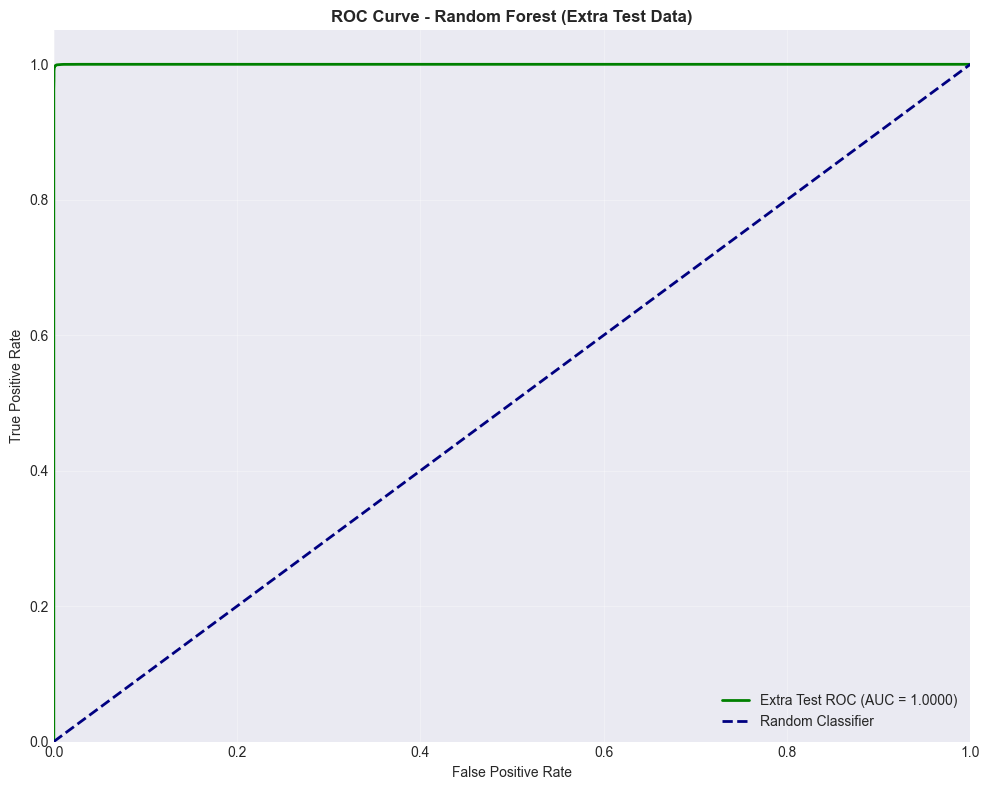


🎯 AUC Score (Extra Test): 1.0000


In [25]:
print("=" * 80)
print("🧪 TESTING PADA DATA TAMBAHAN (EXTRA TEST SET)")
print("=" * 80)

if X_extra_test is not None and y_extra_test is not None:
    print(f"\n📊 Ukuran Extra Test Set: {len(X_extra_test)} sampel")
    print(f"🎯 Model yang digunakan: {best_model_name}")
    
    # Prediksi
    y_extra_pred = best_model.predict(X_extra_test_scaled)
    y_extra_pred_proba = best_model.predict_proba(X_extra_test_scaled) if hasattr(best_model, 'predict_proba') else None
    
    # Evaluasi
    extra_accuracy = accuracy_score(y_extra_test, y_extra_pred)
    extra_precision = precision_score(y_extra_test, y_extra_pred, average='weighted', zero_division=0)
    extra_recall = recall_score(y_extra_test, y_extra_pred, average='weighted', zero_division=0)
    extra_f1 = f1_score(y_extra_test, y_extra_pred, average='weighted', zero_division=0)
    
    print(f"\n{'='*80}")
    print("📈 HASIL EVALUASI PADA EXTRA TEST SET")
    print(f"{'='*80}")
    print(f"   Accuracy:  {extra_accuracy:.4f}")
    print(f"   Precision: {extra_precision:.4f}")
    print(f"   Recall:    {extra_recall:.4f}")
    print(f"   F1-Score:  {extra_f1:.4f}")
    
    # Bandingkan dengan hasil CV
    cv_accuracy = cv_results[best_model_name]['accuracy_mean']
    accuracy_diff = extra_accuracy - cv_accuracy
    
    print(f"\n🔍 PERBANDINGAN:")
    print(f"   CV Accuracy (Training Data):  {cv_accuracy:.4f}")
    print(f"   Test Accuracy (Extra Data):   {extra_accuracy:.4f}")
    print(f"   Difference:                   {accuracy_diff:+.4f}")
    
    if abs(accuracy_diff) < 0.02:
        print(f"\n✅ Model sangat stabil! Performa pada data baru konsisten dengan CV.")
    elif accuracy_diff < -0.05:
        print(f"\n⚠️ Model mungkin sedikit overfit. Performa pada data baru lebih rendah.")
    else:
        print(f"\n✅ Model memiliki performa yang baik pada data baru.")
    
    # Confusion Matrix untuk extra test
    cm_extra = confusion_matrix(y_extra_test, y_extra_pred)
    
    print(f"\n📊 Confusion Matrix (Extra Test Data):")
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm_extra, annot=True, fmt='d', cmap='Greens', ax=ax, cbar=True)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(f'Confusion Matrix - {best_model_name} (Extra Test Data)', fontweight='bold')
    
    if target_encoder is not None:
        ax.set_xticklabels(target_encoder.classes_)
        ax.set_yticklabels(target_encoder.classes_)
    
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print(f"\n{'='*80}")
    print("📋 CLASSIFICATION REPORT (EXTRA TEST DATA)")
    print(f"{'='*80}")
    
    if target_encoder is not None:
        target_names = target_encoder.classes_
    else:
        target_names = None
    
    print(classification_report(y_extra_test, y_extra_pred, target_names=target_names))
    
    # ROC Curve untuk extra test (jika binary)
    if y_extra_pred_proba is not None and len(np.unique(y_extra_test)) == 2:
        fpr_extra, tpr_extra, _ = roc_curve(y_extra_test, y_extra_pred_proba[:, 1])
        roc_auc_extra = roc_auc_score(y_extra_test, y_extra_pred_proba[:, 1])
        
        plt.figure(figsize=(10, 8))
        plt.plot(fpr_extra, tpr_extra, color='green', lw=2, label=f'Extra Test ROC (AUC = {roc_auc_extra:.4f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {best_model_name} (Extra Test Data)', fontweight='bold')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"\n🎯 AUC Score (Extra Test): {roc_auc_extra:.4f}")
    
else:
    print("\nℹ️ Tidak ada data extra test (total data ≤ 2000).")
    print("   Model telah dievaluasi menggunakan Cross-Validation pada seluruh dataset.")

## 📝 10. Kesimpulan dan Rekomendasi

Ringkasan dari seluruh analisis dan rekomendasi untuk penggunaan model di masa depan.

In [26]:
print("=" * 80)
print("📝 KESIMPULAN DAN REKOMENDASI")
print("=" * 80)

print("\n🎯 RINGKASAN ANALISIS:")
print("=" * 80)

# 1. Dataset Summary
print("\n1️⃣ DATASET:")
print(f"   - Total sampel: {len(df)}")
print(f"   - Jumlah fitur: {len(feature_names)}")
print(f"   - Sampel untuk training/validation: {len(X_main)}")
if X_extra_test is not None:
    print(f"   - Sampel untuk extra testing: {len(X_extra_test)}")
print(f"   - Missing values: {'Tidak ada' if df.isnull().sum().sum() == 0 else 'Ditangani dengan imputasi'}")
print(f"   - Duplikasi: {'Tidak ada' if df.duplicated().sum() == 0 else f'{df.duplicated().sum()} baris'}")

# 2. Model Performance
print("\n2️⃣ PERFORMA MODEL:")
print(f"   - Model terbaik: {best_model_name}")
print(f"   - CV Accuracy: {cv_results[best_model_name]['accuracy_mean']:.4f} (±{cv_results[best_model_name]['accuracy_std']:.4f})")
print(f"   - CV F1-Score: {cv_results[best_model_name]['f1_mean']:.4f}")

if X_extra_test is not None:
    print(f"   - Extra Test Accuracy: {extra_accuracy:.4f}")
    print(f"   - Extra Test F1-Score: {extra_f1:.4f}")

# 3. Key Findings
print("\n3️⃣ TEMUAN UTAMA:")
print(f"   ✅ Model {best_model_name} menunjukkan performa terbaik")
print(f"   ✅ Stratified K-Fold CV memastikan evaluasi yang robust")

if X_extra_test is not None:
    if abs(extra_accuracy - cv_results[best_model_name]['accuracy_mean']) < 0.02:
        print(f"   ✅ Model stabil dan konsisten pada data baru")
    elif extra_accuracy > cv_results[best_model_name]['accuracy_mean']:
        print(f"   ✅ Model bahkan lebih baik pada data test tambahan")
    else:
        print(f"   ⚠️ Sedikit penurunan performa pada data test (normal)")

if hasattr(best_model, 'feature_importances_'):
    top_feature = feature_imp_df.iloc[0]['Feature']
    print(f"   ✅ Fitur paling penting: {top_feature}")

print("\n4️⃣ KEPUTUSAN YANG DIAMBIL & ALASANNYA:")
print("   📌 Menggunakan 2000 sampel untuk training/validation dengan Stratified Sampling:")
print("      → Alasan: Balance antara training yang cukup dan menyisakan data untuk")
print("                validasi independen. Stratified sampling memastikan proporsi")
print("                kelas terjaga di data utama dan extra test, menghindari bias")
print()
print("   📌 Stratified K-Fold Cross-Validation (5-fold):")
print("      → Alasan: Mempertahankan proporsi kelas di setiap fold, memberikan")
print("                estimasi performa yang lebih reliable dan mengurangi bias")
print()
print("   📌 Testing pada data tambahan dengan Stratified Split:")
print("      → Alasan: Validasi final untuk mengukur generalisasi model pada data")
print("                yang benar-benar tidak pernah dilihat model, dengan proporsi")
print("                kelas yang konsisten untuk evaluasi yang fair")
print()
print("   📌 Menggunakan StandardScaler:")
print("      → Alasan: Memastikan semua fitur memiliki skala yang sama, penting")
print("                untuk model seperti SVM, Logistic Regression, dan KNN")
print()
print("   📌 One-Hot Encoding untuk fitur kategorikal:")
print("      → Alasan: Tidak mengasumsikan hubungan ordinal antar kategori, cocok")
print("                untuk semua jenis model, dan mencegah model salah menginterpretasi")
print("                jarak antar kategori yang tidak memiliki makna ordinal")

print("\n5️⃣ REKOMENDASI:")
print("   💡 Model siap untuk deployment dengan catatan:")
print(f"      - Gunakan {best_model_name} sebagai model final")
print("      - Monitor performa model secara berkala")
print("      - Pertimbangkan retraining jika ada data baru")
print()
print("   💡 Untuk improvement lebih lanjut:")
print("      - Hyperparameter tuning menggunakan GridSearchCV atau RandomizedSearchCV")
print("      - Feature engineering untuk membuat fitur baru yang lebih informatif")
print("      - Ensemble methods untuk menggabungkan beberapa model terbaik")
print("      - Analisis error cases untuk memahami kesalahan prediksi")

print("\n" + "=" * 80)
print("🎉 ANALISIS SELESAI!")
print("=" * 80)

📝 KESIMPULAN DAN REKOMENDASI

🎯 RINGKASAN ANALISIS:

1️⃣ DATASET:
   - Total sampel: 61069
   - Jumlah fitur: 102
   - Sampel untuk training/validation: 2000
   - Sampel untuk extra testing: 59069
   - Missing values: Ditangani dengan imputasi
   - Duplikasi: 146 baris

2️⃣ PERFORMA MODEL:
   - Model terbaik: Random Forest
   - CV Accuracy: 0.9915 (±0.0046)
   - CV F1-Score: 0.9915
   - Extra Test Accuracy: 0.9981
   - Extra Test F1-Score: 0.9981

3️⃣ TEMUAN UTAMA:
   ✅ Model Random Forest menunjukkan performa terbaik
   ✅ Stratified K-Fold CV memastikan evaluasi yang robust
   ✅ Model stabil dan konsisten pada data baru
   ✅ Fitur paling penting: stem-width

4️⃣ KEPUTUSAN YANG DIAMBIL & ALASANNYA:
   📌 Menggunakan 2000 sampel untuk training/validation dengan Stratified Sampling:
      → Alasan: Balance antara training yang cukup dan menyisakan data untuk
                validasi independen. Stratified sampling memastikan proporsi
                kelas terjaga di data utama dan extra t

## 💾 11. Save Model (Opsional)

Simpan model terbaik untuk penggunaan di masa depan.

In [27]:
import pickle
import os

# Buat folder models jika belum ada
model_dir = '../models'
os.makedirs(model_dir, exist_ok=True)

# Save model terbaik
model_filename = f'{model_dir}/best_model_{best_model_name.lower().replace(" ", "_")}.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(best_model, f)

print(f"✅ Model berhasil disimpan: {model_filename}")

# Save scaler
scaler_filename = f'{model_dir}/scaler.pkl'
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)

print(f"✅ Scaler berhasil disimpan: {scaler_filename}")

# Save feature names
feature_names_filename = f'{model_dir}/feature_names.pkl'
with open(feature_names_filename, 'wb') as f:
    pickle.dump(feature_names, f)

print(f"✅ Feature names berhasil disimpan: {feature_names_filename}")

# Save target encoder jika ada
if target_encoder is not None:
    target_encoder_filename = f'{model_dir}/target_encoder.pkl'
    with open(target_encoder_filename, 'wb') as f:
        pickle.dump(target_encoder, f)
    print(f"✅ Target encoder berhasil disimpan: {target_encoder_filename}")

# Save feature names
feature_names_filename = f'{model_dir}/feature_names.pkl'
with open(feature_names_filename, 'wb') as f:
    pickle.dump(feature_names, f)

print(f"✅ Feature names berhasil disimpan: {feature_names_filename}")

print(f"\n📦 Semua file model berhasil disimpan di folder: {model_dir}")
print("\n💡 Untuk menggunakan model:")
print("   1. Load model dengan pickle.load()")
print("   2. Load scaler yang sesuai")
print("   3. Preprocess data baru:")
print("      - Lakukan One-Hot Encoding yang sama dengan pd.get_dummies()")
print("      - Pastikan kolom sesuai dengan feature_names yang tersimpan")
print("      - Apply scaler.transform()")
print("   4. Prediksi dengan model.predict()")

✅ Model berhasil disimpan: ../models/best_model_random_forest.pkl
✅ Scaler berhasil disimpan: ../models/scaler.pkl
✅ Feature names berhasil disimpan: ../models/feature_names.pkl
✅ Target encoder berhasil disimpan: ../models/target_encoder.pkl
✅ Feature names berhasil disimpan: ../models/feature_names.pkl

📦 Semua file model berhasil disimpan di folder: ../models

💡 Untuk menggunakan model:
   1. Load model dengan pickle.load()
   2. Load scaler yang sesuai
   3. Preprocess data baru:
      - Lakukan One-Hot Encoding yang sama dengan pd.get_dummies()
      - Pastikan kolom sesuai dengan feature_names yang tersimpan
      - Apply scaler.transform()
   4. Prediksi dengan model.predict()


---

## 📚 Referensi dan Catatan

**Dataset Source**: 
- UCI Machine Learning Repository - Secondary Mushroom Dataset (ID: 848)
- URL: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset

**Metodologi**:
- Stratified K-Fold Cross-Validation untuk evaluasi yang robust
- Multiple algorithm comparison untuk menemukan model terbaik
- Extra test set untuk validasi generalisasi model

**Tools & Libraries**:
- Python 3.x
- scikit-learn untuk machine learning
- pandas & numpy untuk data manipulation
- matplotlib & seaborn untuk visualisasi
- scipy untuk statistical tests

---

### 🙏 Terima Kasih!

Notebook ini dirancang untuk memberikan pemahaman menyeluruh tentang proses machine learning dari awal hingga akhir. Setiap keputusan dibuat dengan pertimbangan yang matang dan dijelaskan dengan alasan yang jelas.

**Jangan ragu untuk**:
- Eksperimen dengan hyperparameter yang berbeda
- Mencoba feature engineering baru
- Menggunakan algoritma ensemble yang lebih canggih
- Melakukan analisis error untuk improvement

**Happy Learning! 🚀**